In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_excel('mergedfinal.xlsx')

# Ensure Datetime column is parsed and sorted
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

# Interpolate missing values
df = df.interpolate(method='time')

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

# Create sequences
def create_sequences(data, sequence_length=24):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, :])  # Input features
        y.append(data[i + sequence_length, :])   # Target features (multi-output)
    return np.array(X), np.array(y)

X, y = create_sequences(df_scaled.values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(y_train.shape[1])  # Output layer for all target features
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Save model and scaler
model.save('aqi_multi_output_model.h5')
import joblib
joblib.dump(scaler, 'scaler.pkl')





Epoch 1/50

701/701 [==============================] - 23s 25ms/step - loss: 0.0037 - val_loss: 0.0026
Epoch 2/50
701/701 [==============================] - 17s 24ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 3/50
701/701 [==============================] - 17s 24ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 4/50
701/701 [==============================] - 17s 24ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 5/50
701/701 [==============================] - 17s 25ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 6/50
701/701 [==============================] - 25s 36ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 7/50
701/701 [==============================] - 33s 47ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 8/50
701/701 [==============================] - 33s 47ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 9/50
701/701 [==============================] - 36s 51ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 10/50
701/701 [==============================] - 35s 50ms/step - loss: 0

c:\Users\swaya\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['scaler.pkl']

219/219 [==============================] - 2s 7ms/step


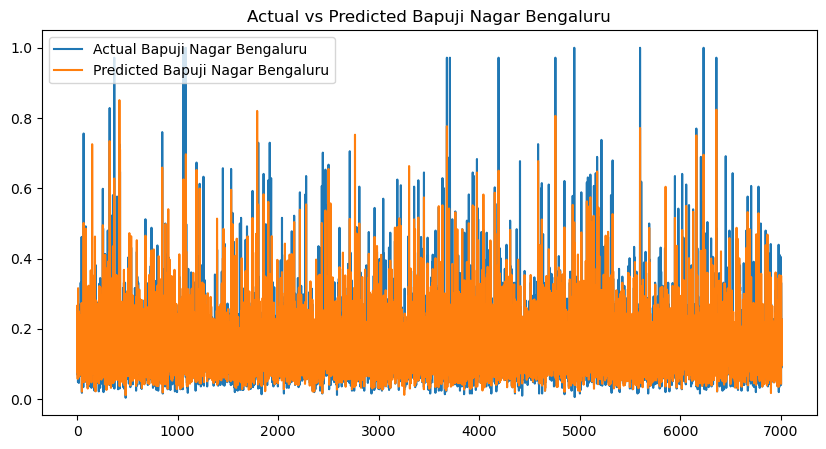

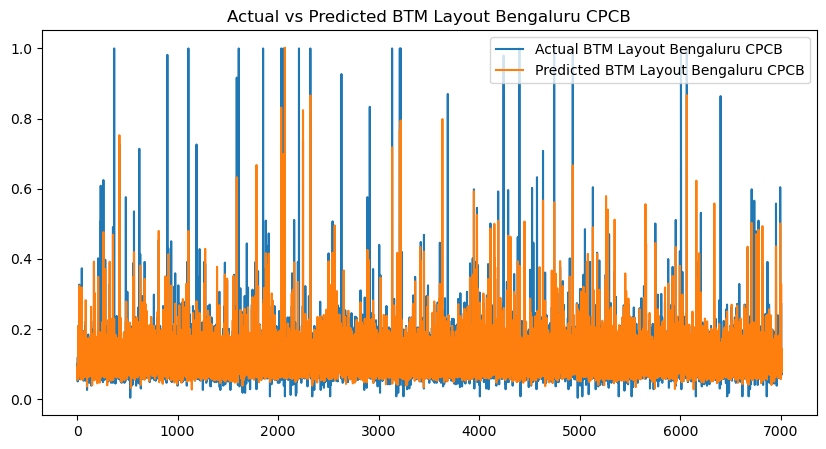

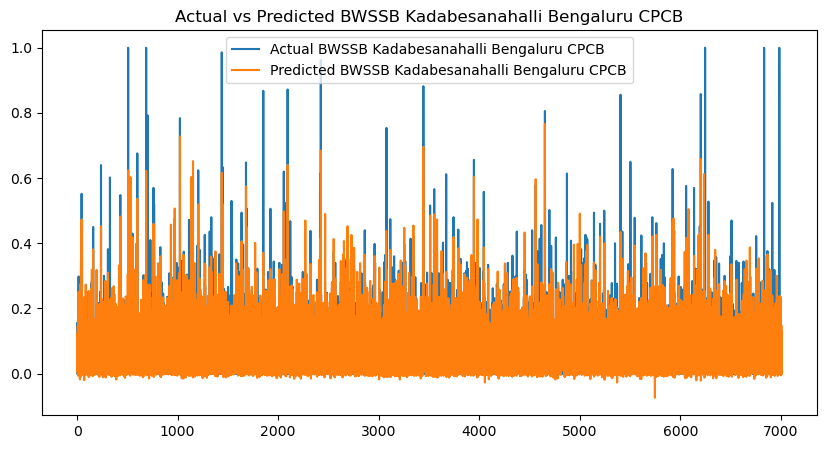

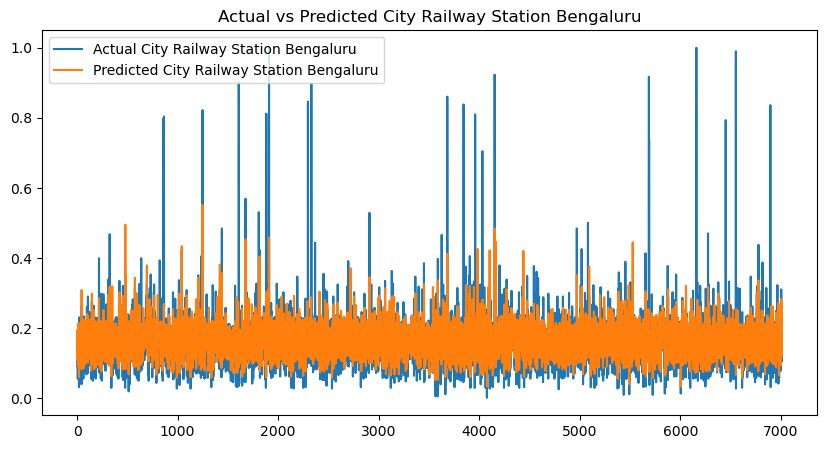

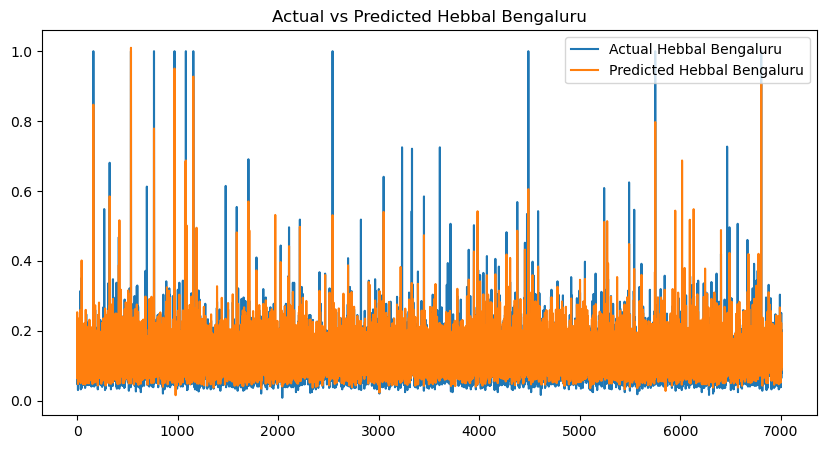

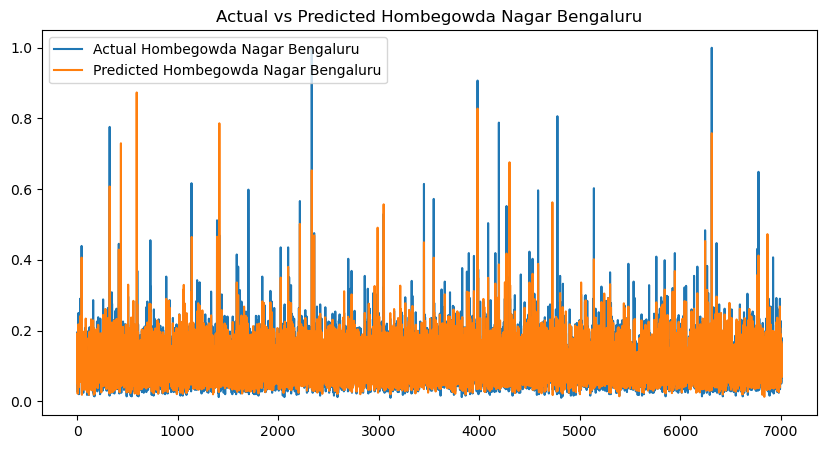

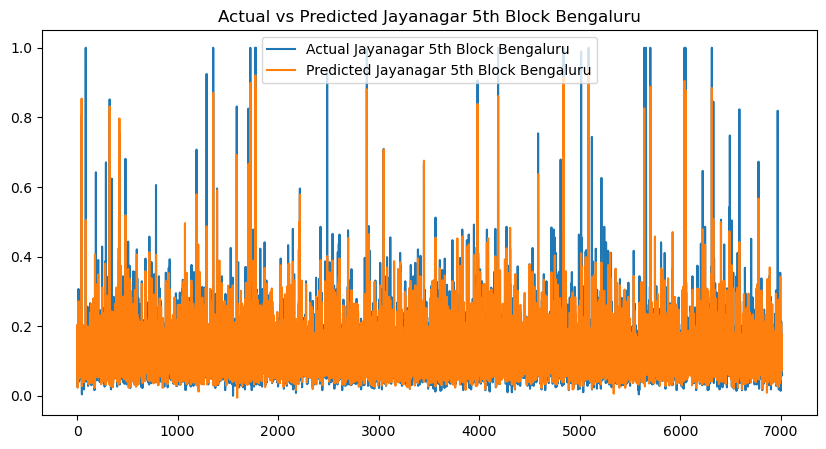

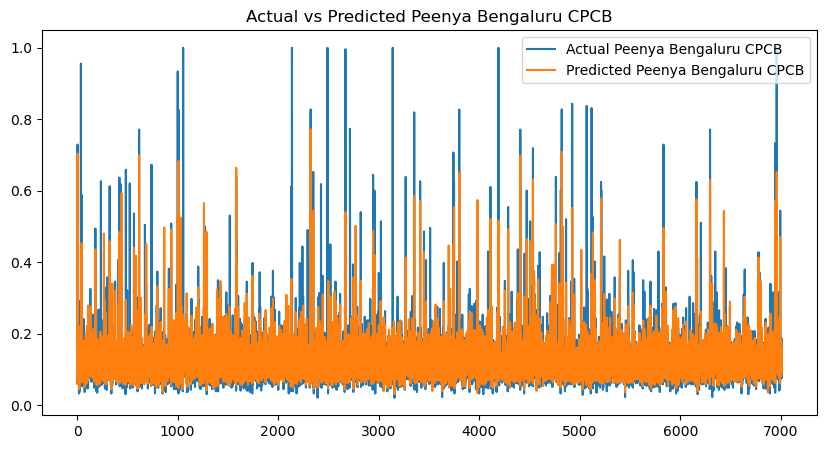

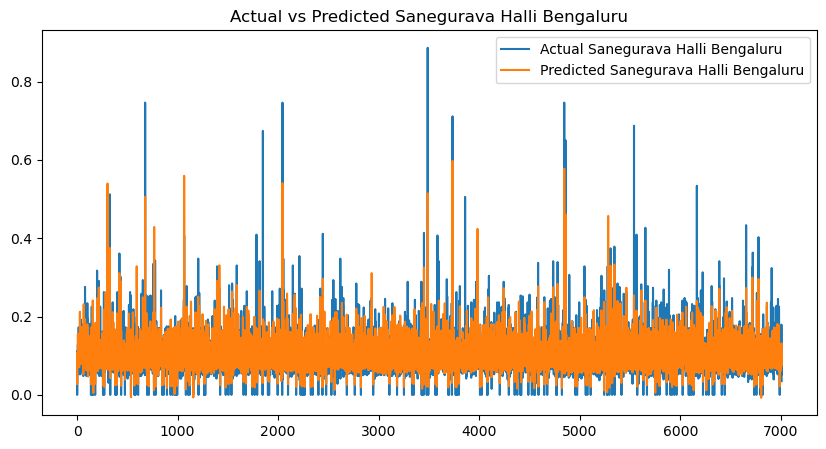

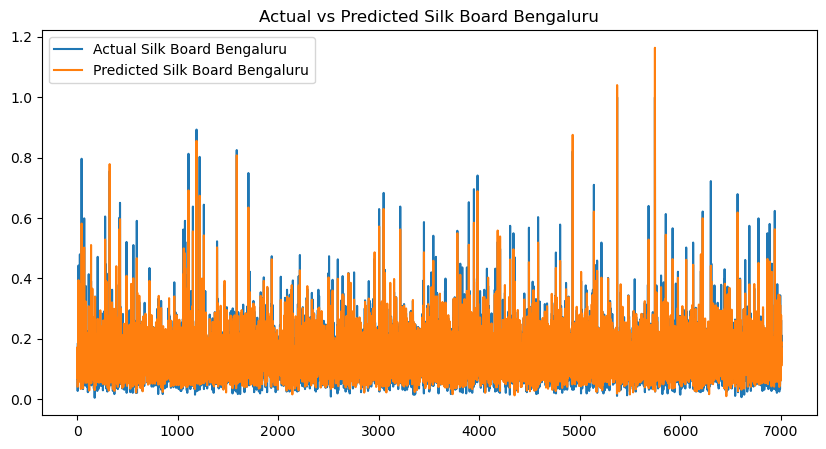

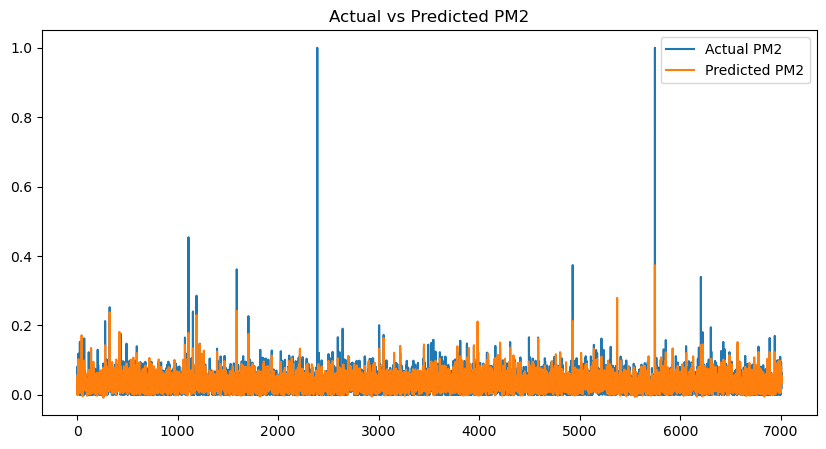

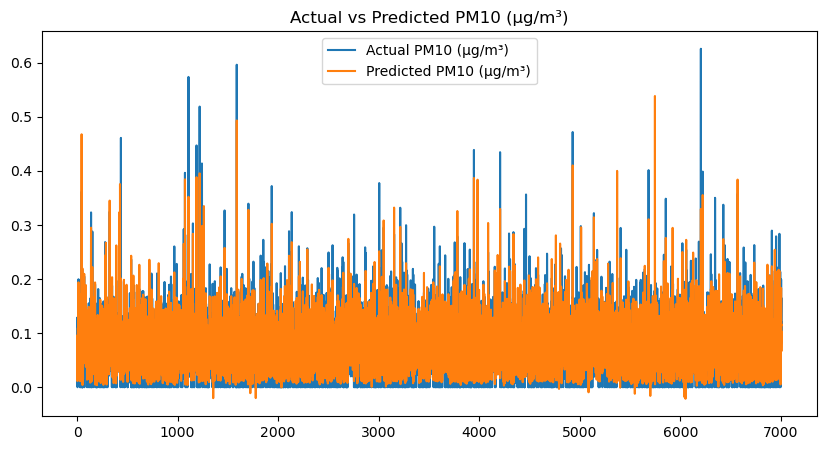

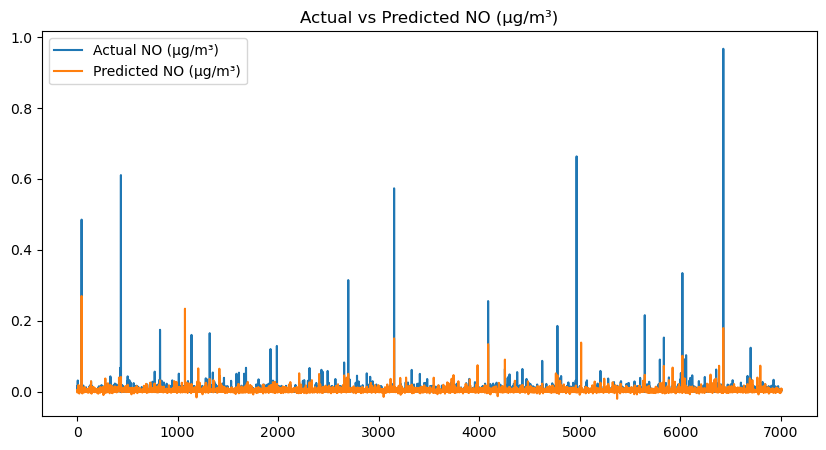

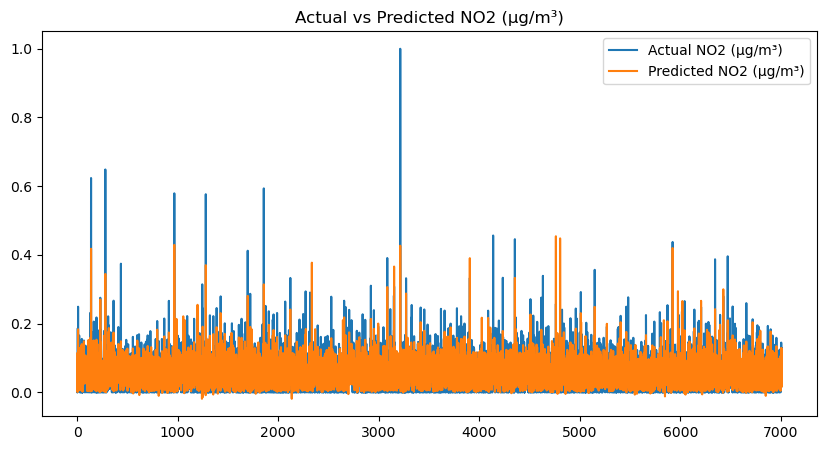

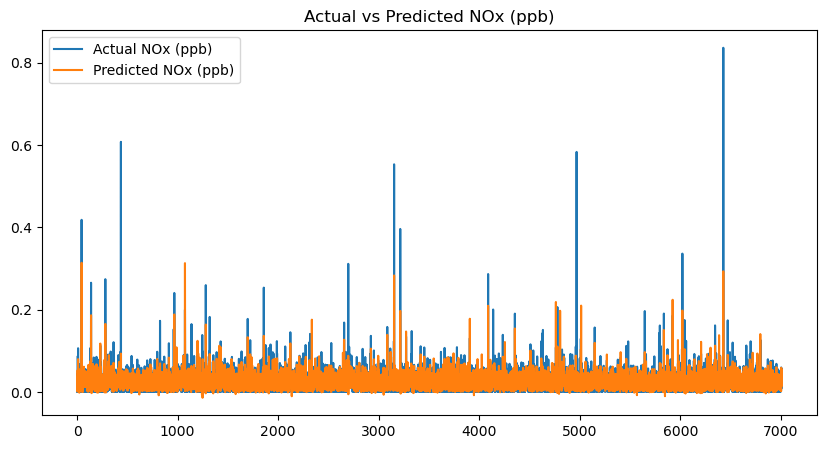

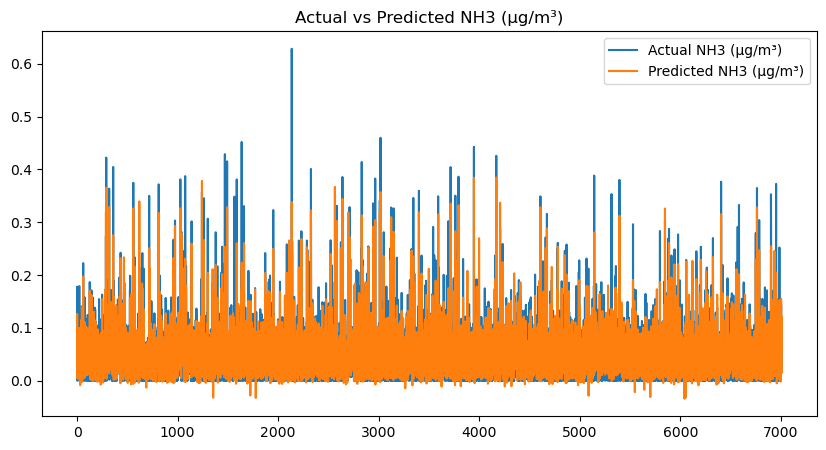

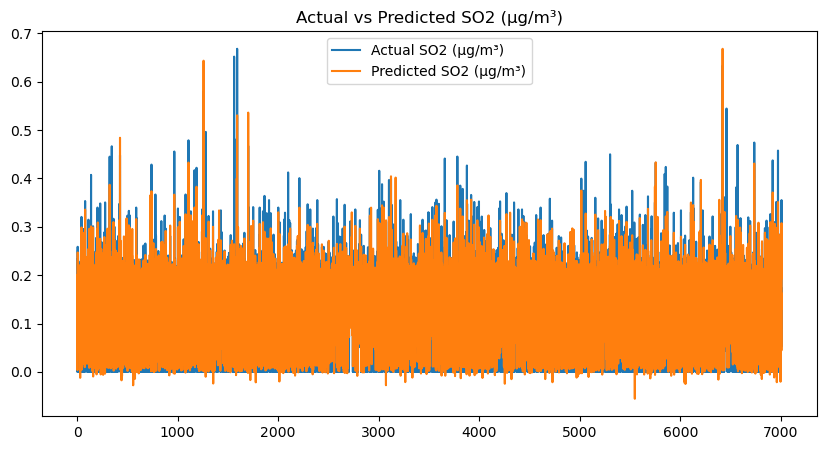

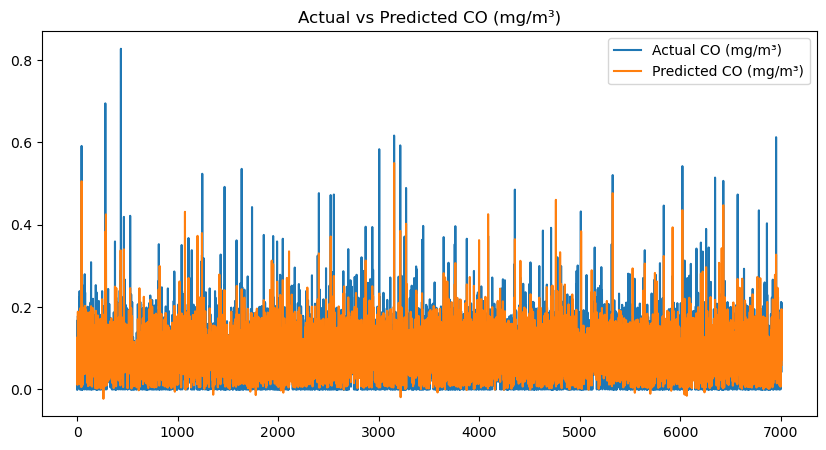

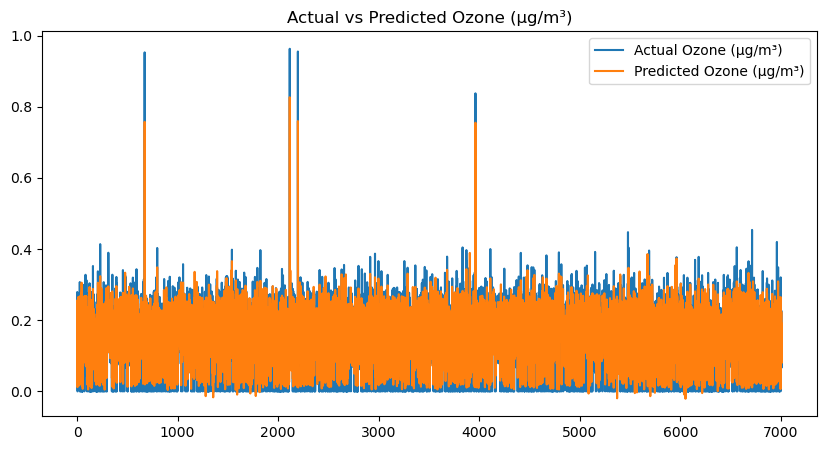

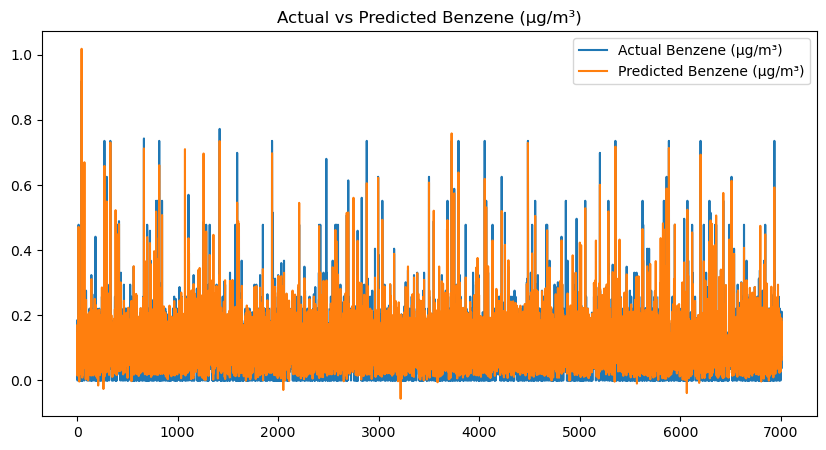

In [3]:
import matplotlib.pyplot as plt

# Predict
y_pred = model.predict(X_test)

# Plot predictions vs actual values for each pollutant
pollutants = df.columns
for i, pollutant in enumerate(pollutants):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test[:, i], label=f'Actual {pollutant}')
    plt.plot(y_pred[:, i], label=f'Predicted {pollutant}')
    plt.title(f'Actual vs Predicted {pollutant}')
    plt.legend()
    plt.show()


219/219 [==============================] - 2s 9ms/step


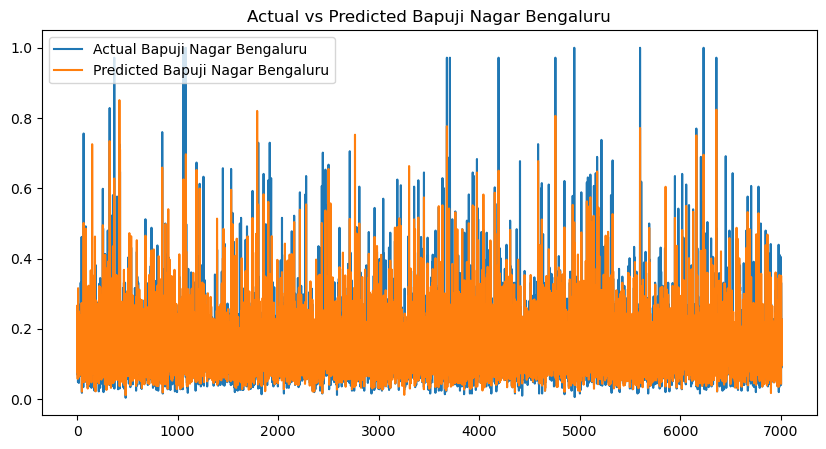

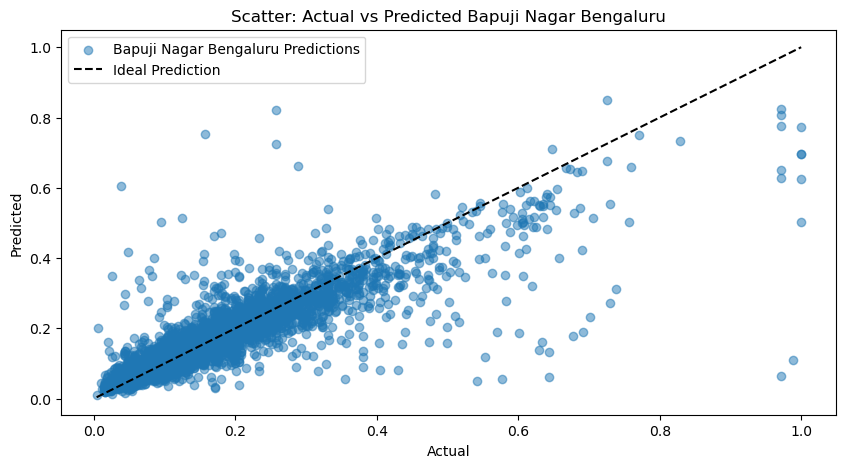

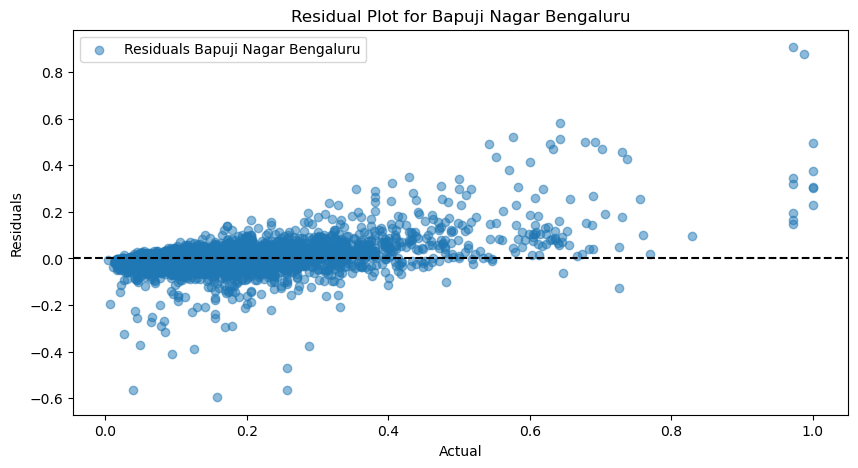

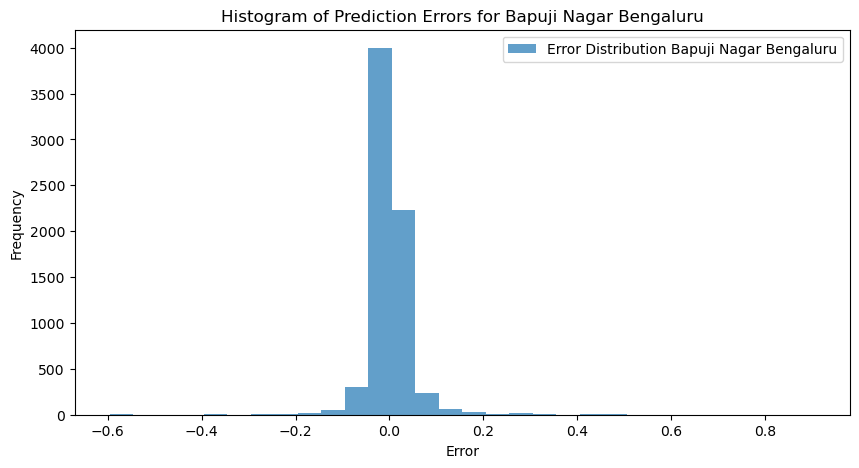

C:\Users\swaya\AppData\Local\Temp\ipykernel_28692\1125678586.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')


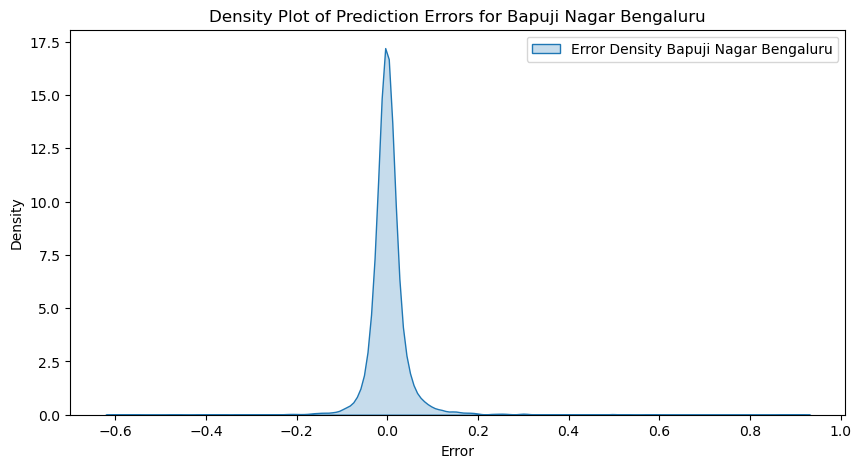

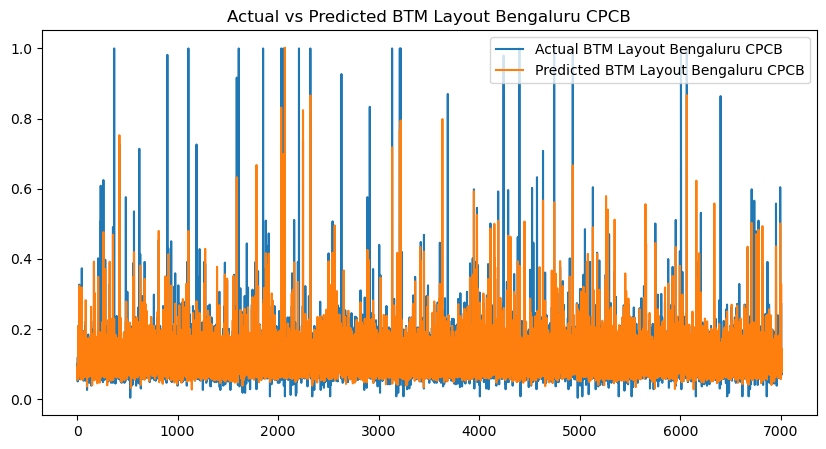

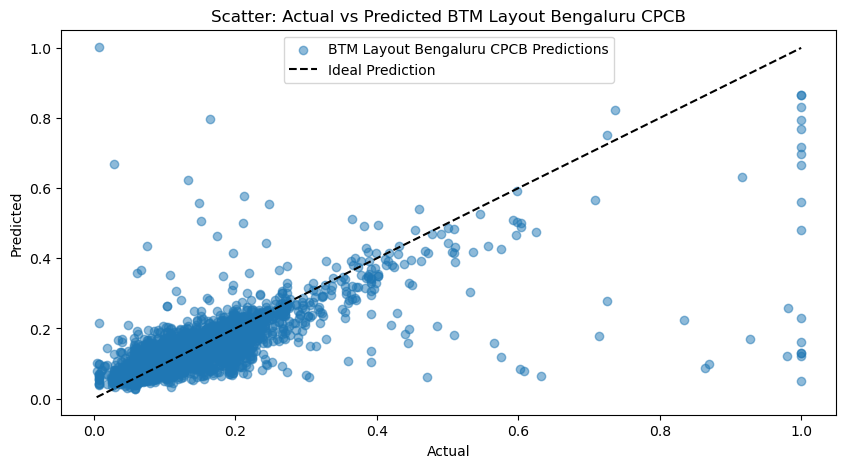

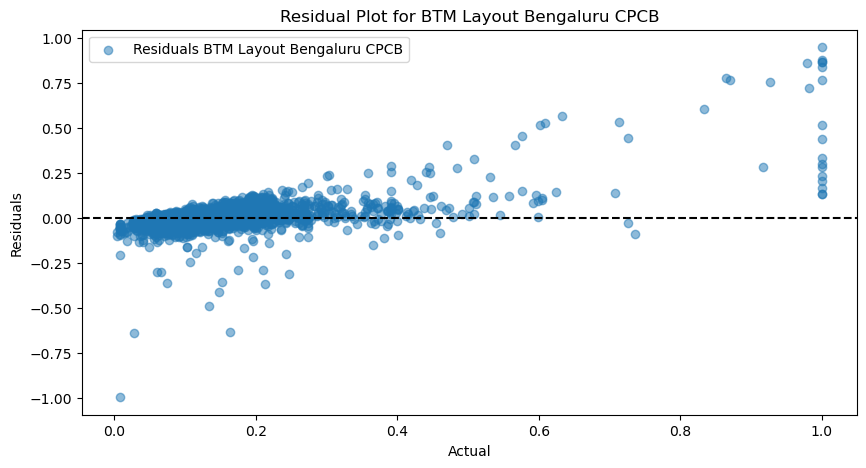

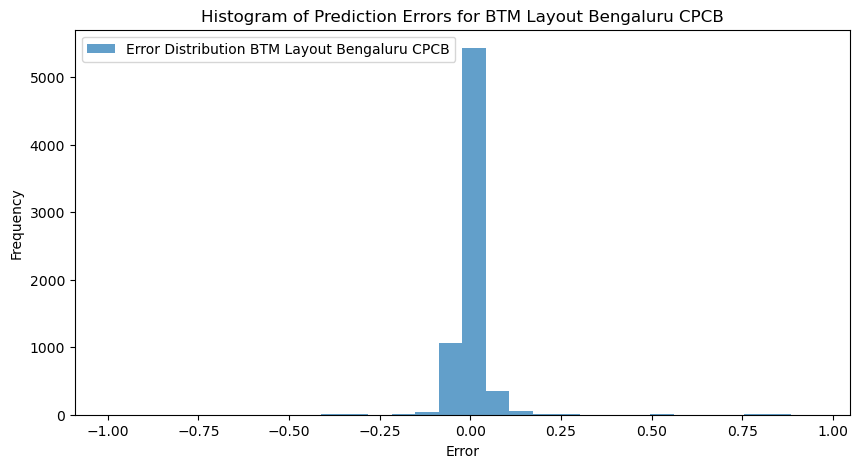

C:\Users\swaya\AppData\Local\Temp\ipykernel_28692\1125678586.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')


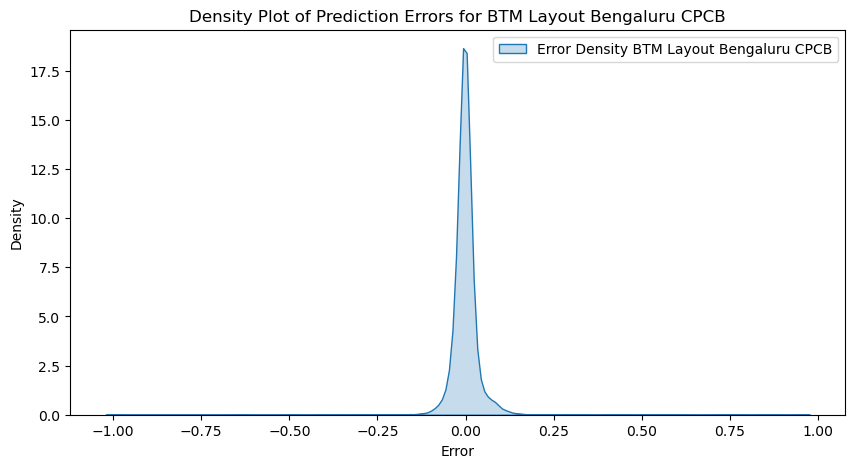

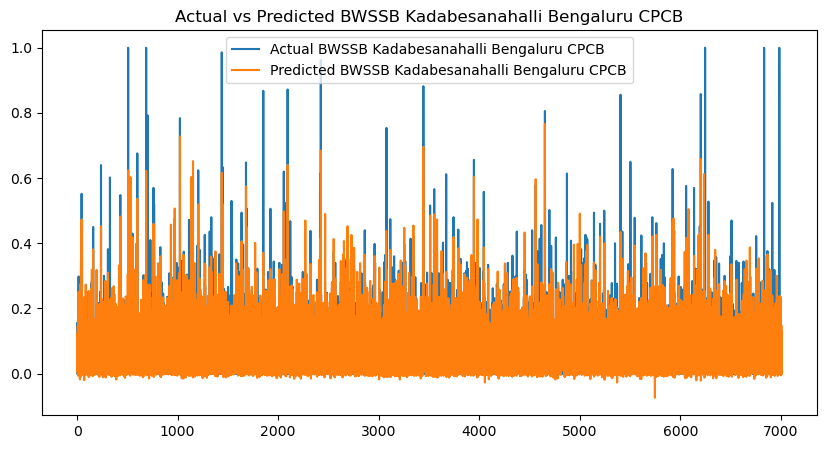

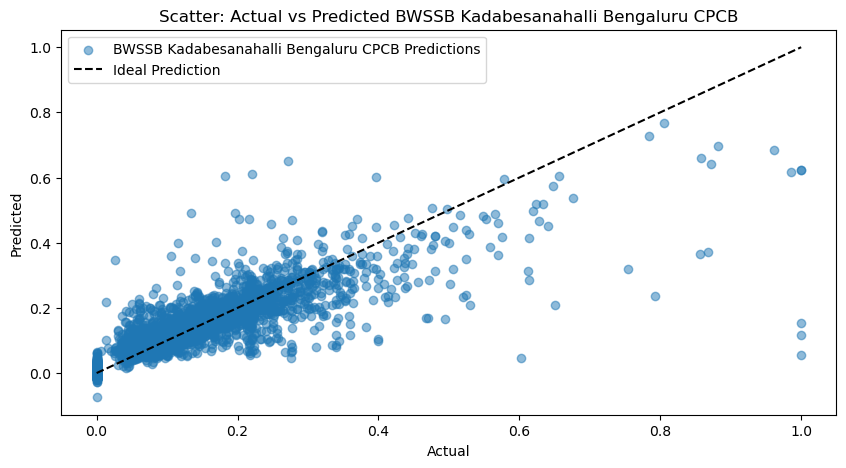

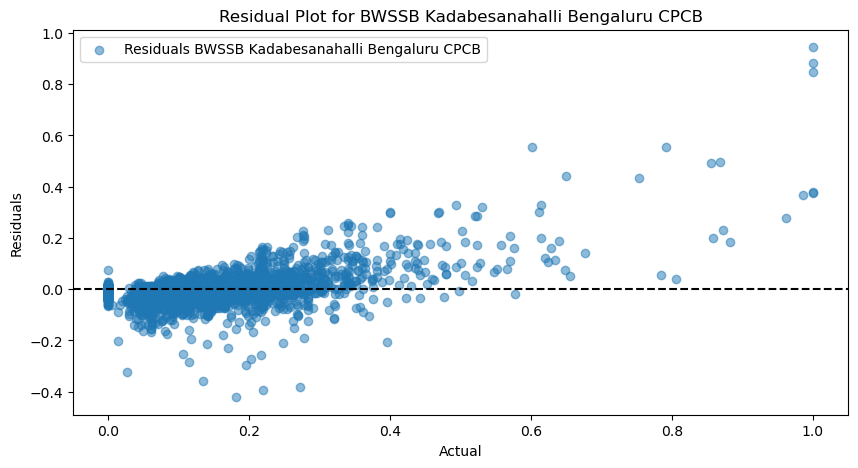

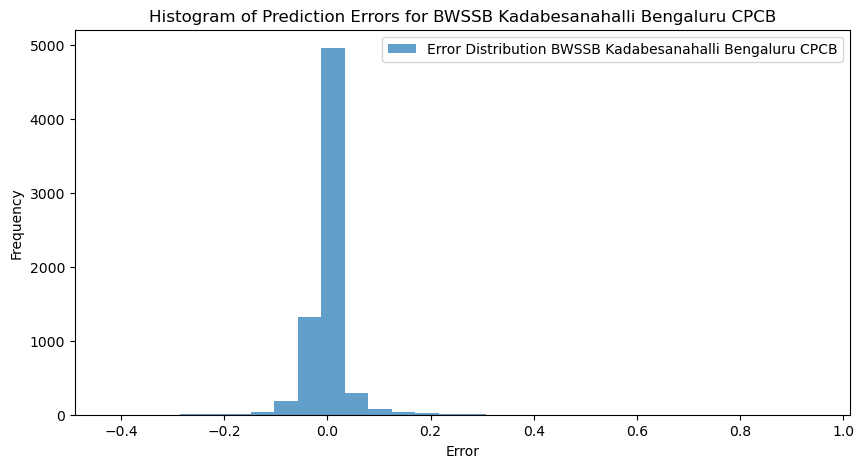

C:\Users\swaya\AppData\Local\Temp\ipykernel_28692\1125678586.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')


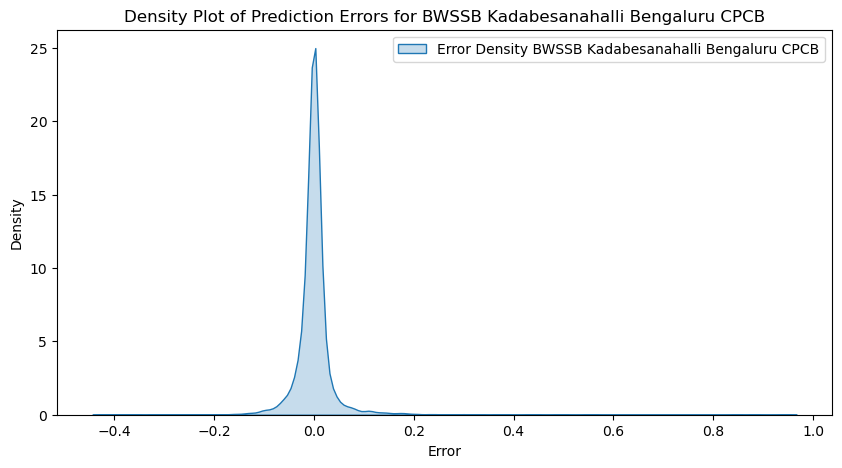

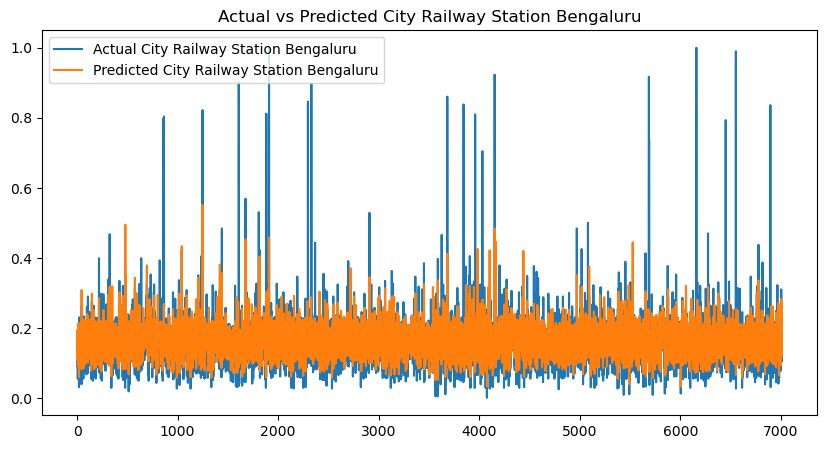

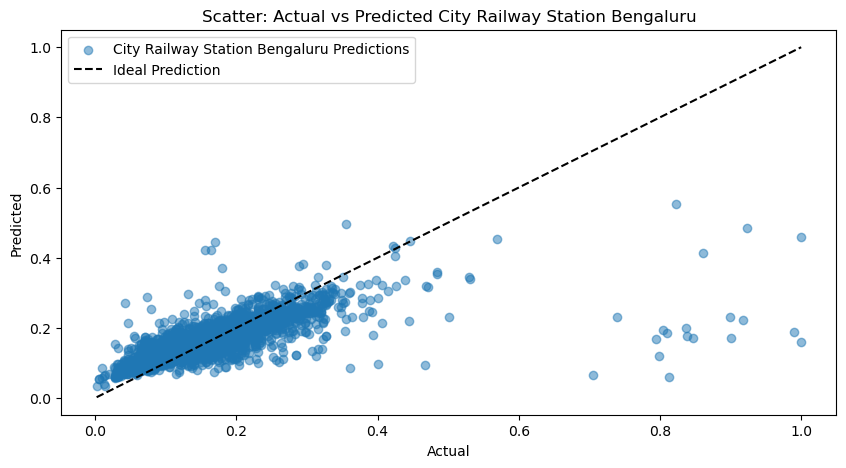

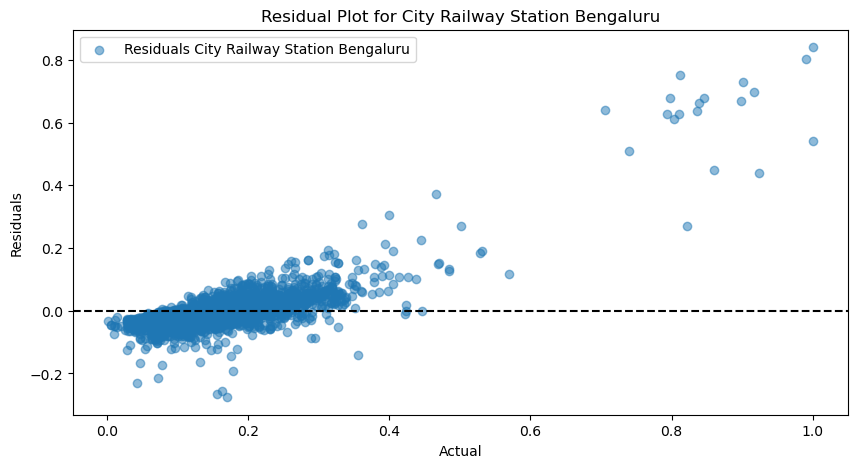

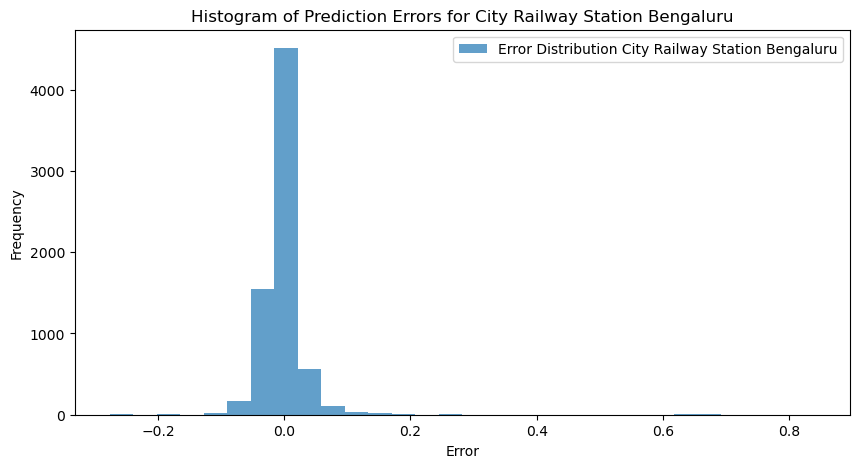

C:\Users\swaya\AppData\Local\Temp\ipykernel_28692\1125678586.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')


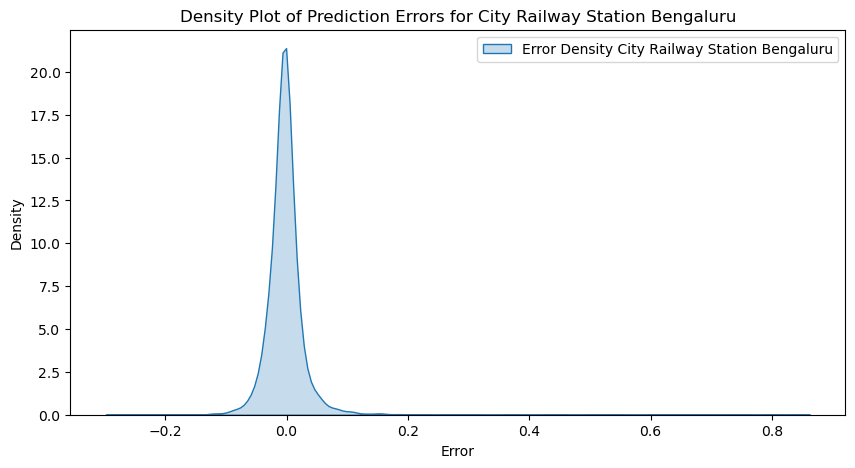

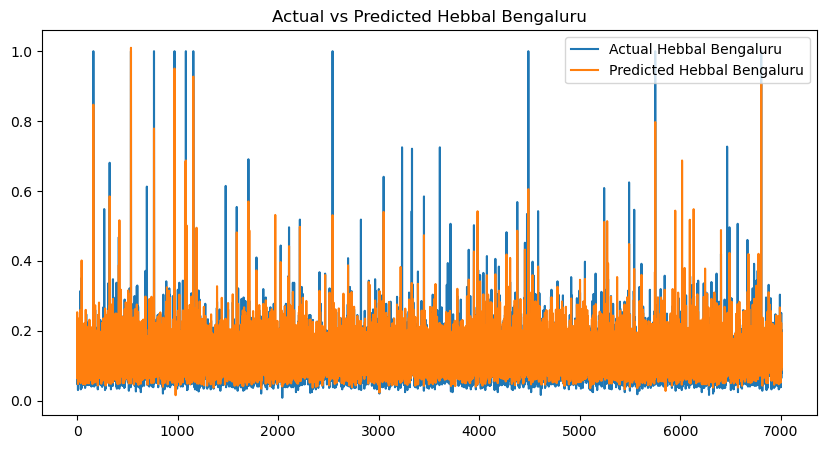

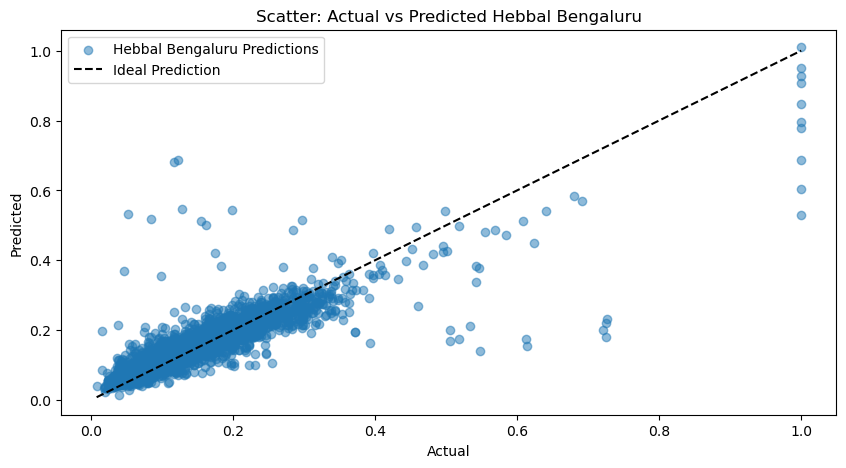

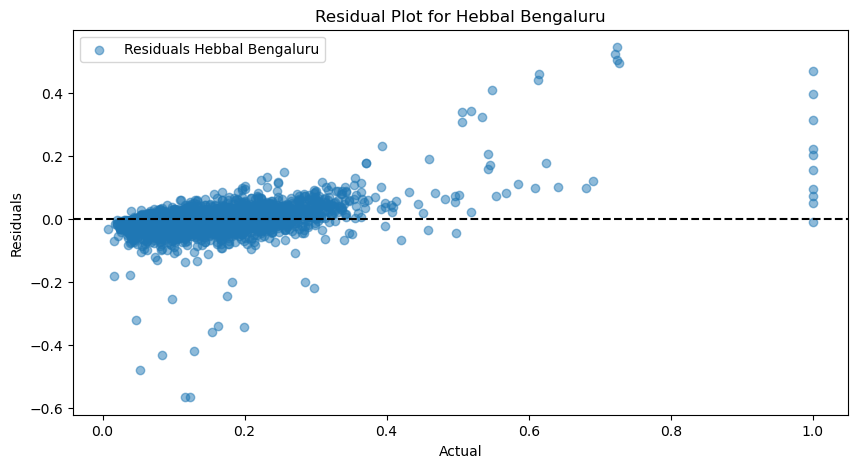

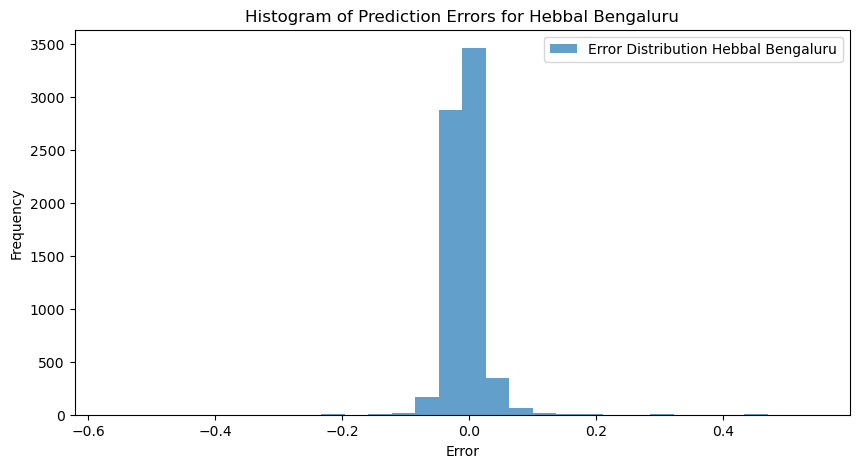

C:\Users\swaya\AppData\Local\Temp\ipykernel_28692\1125678586.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')


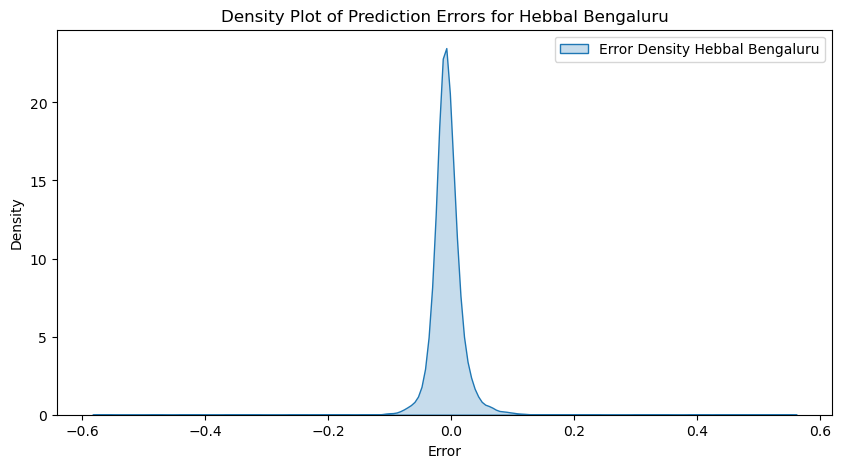

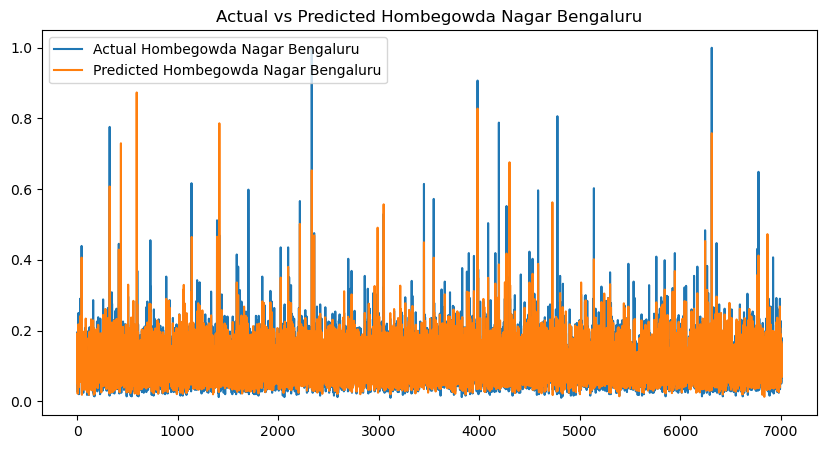

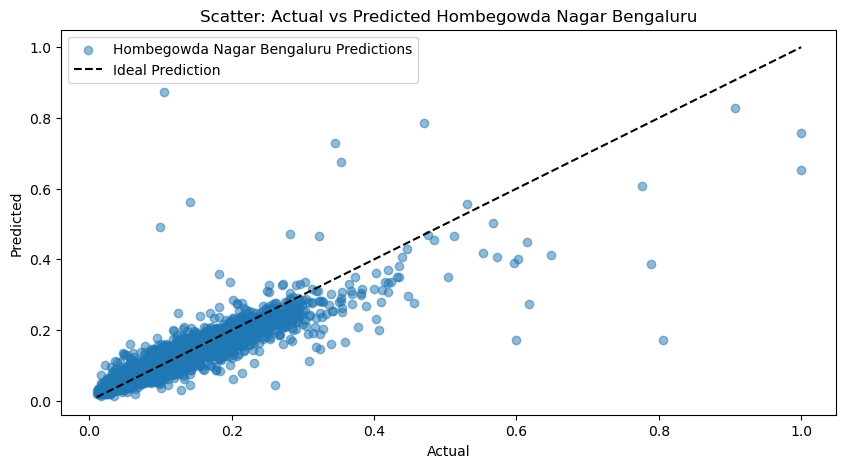

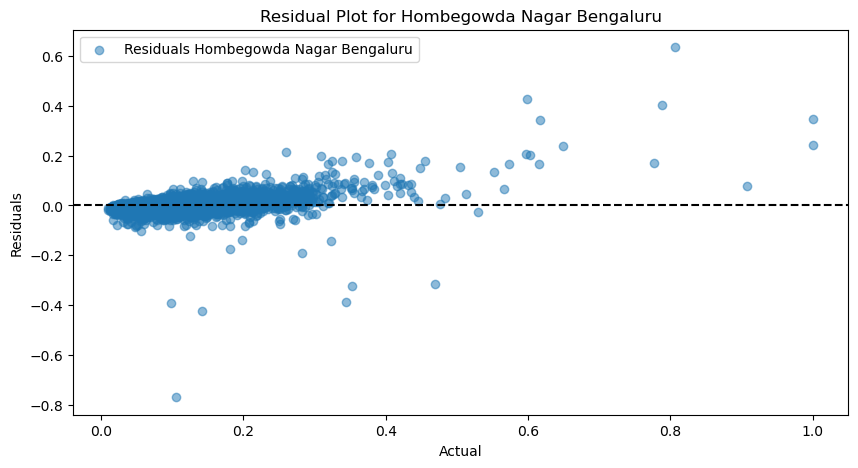

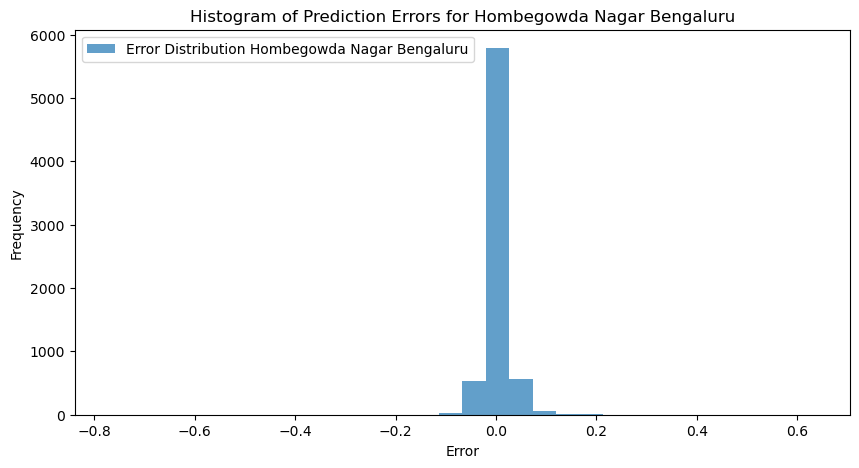

C:\Users\swaya\AppData\Local\Temp\ipykernel_28692\1125678586.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')


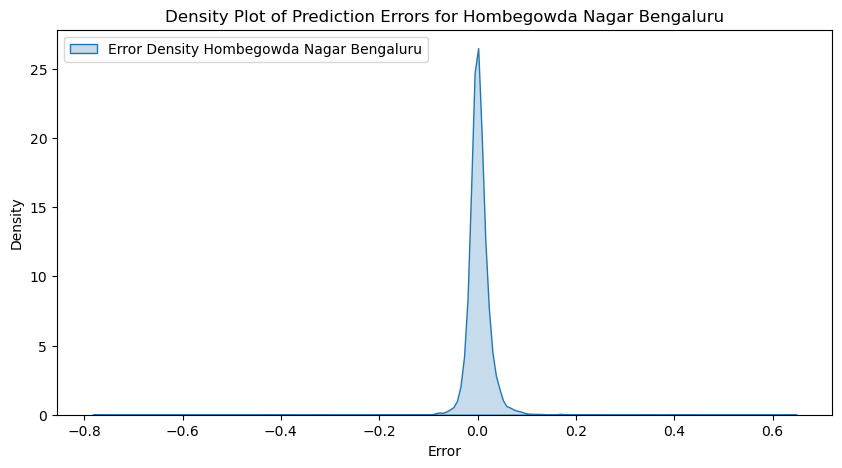

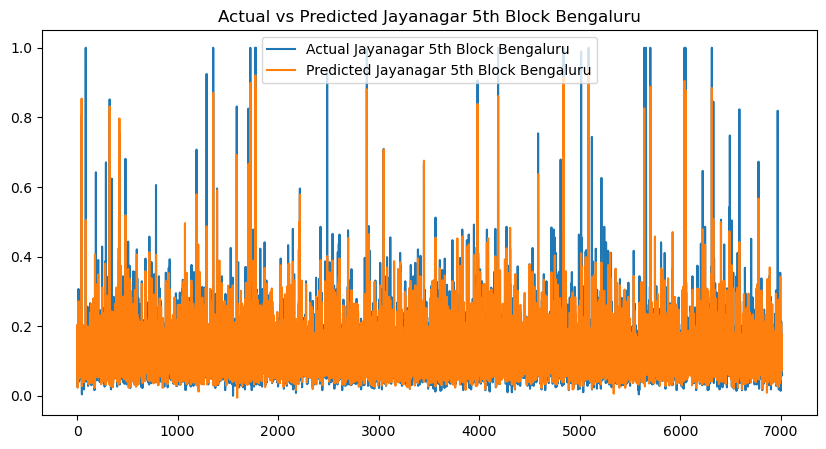

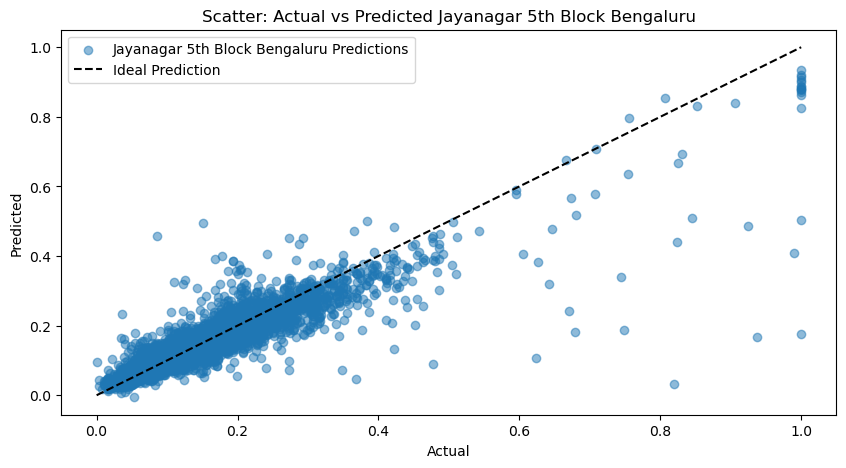

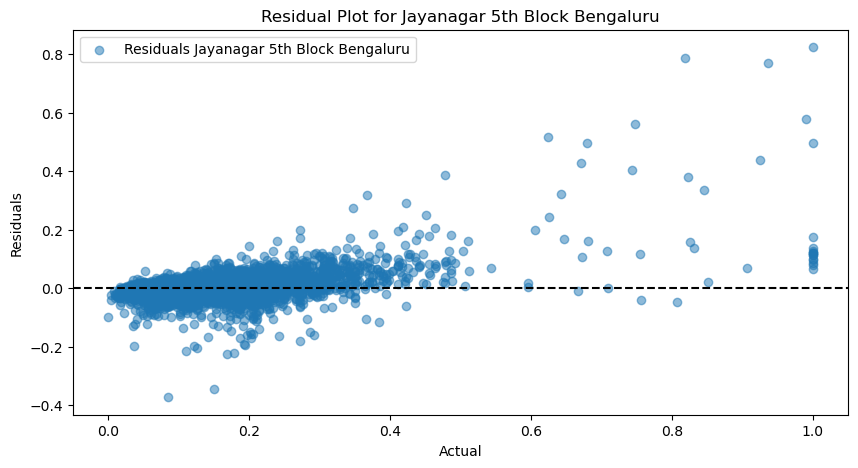

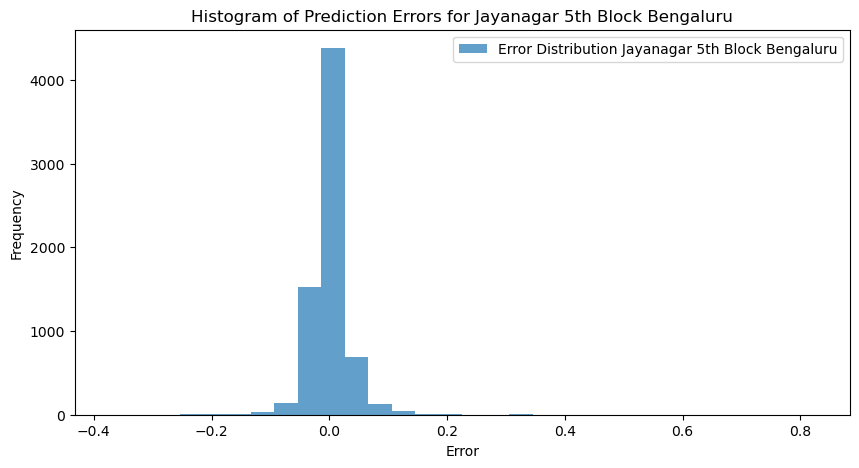

C:\Users\swaya\AppData\Local\Temp\ipykernel_28692\1125678586.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')


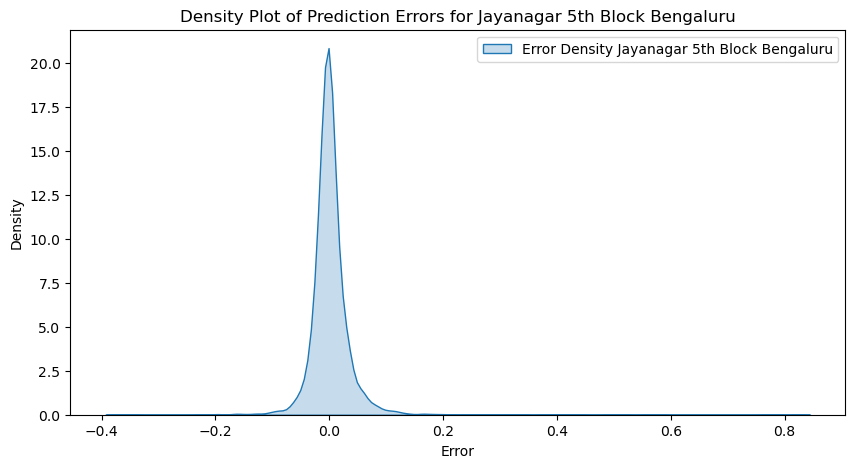

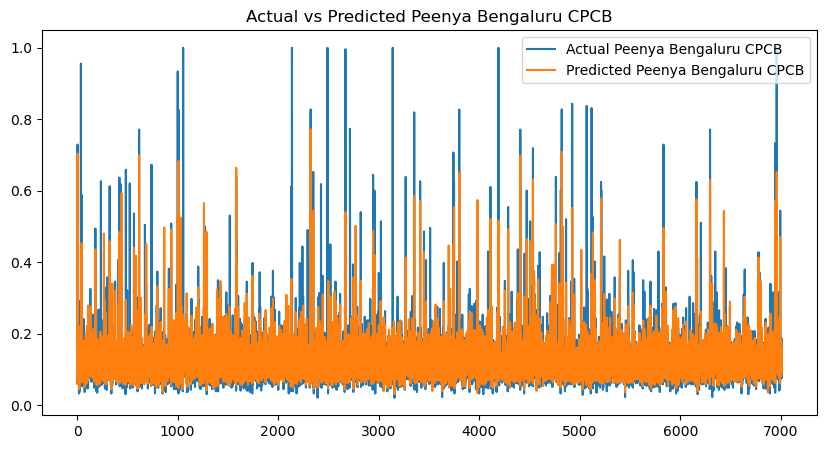

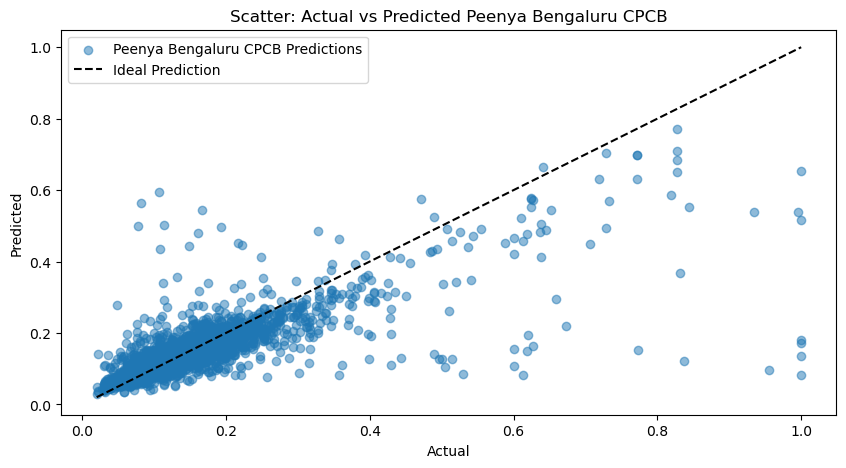

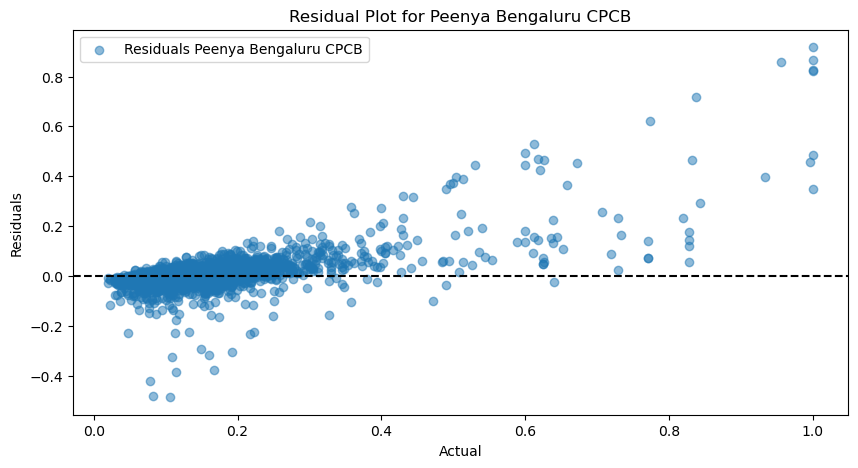

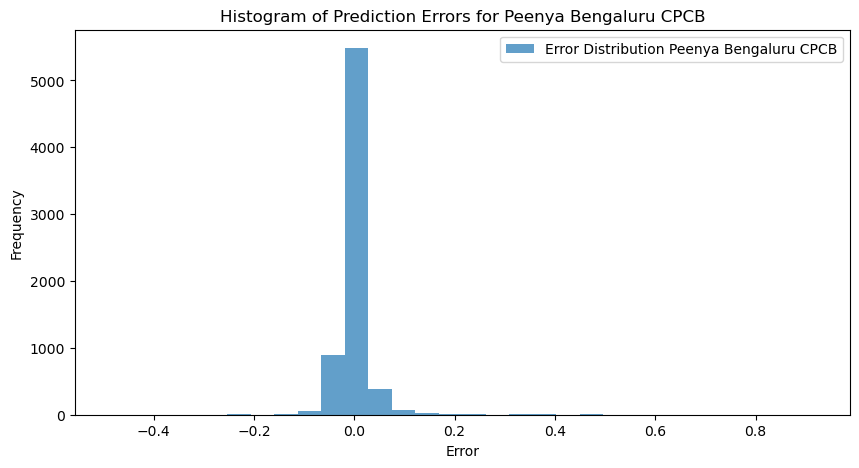

C:\Users\swaya\AppData\Local\Temp\ipykernel_28692\1125678586.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')


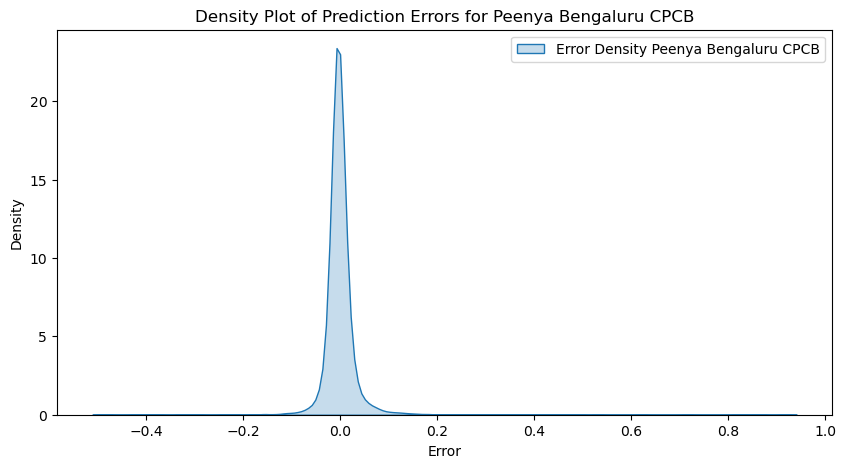

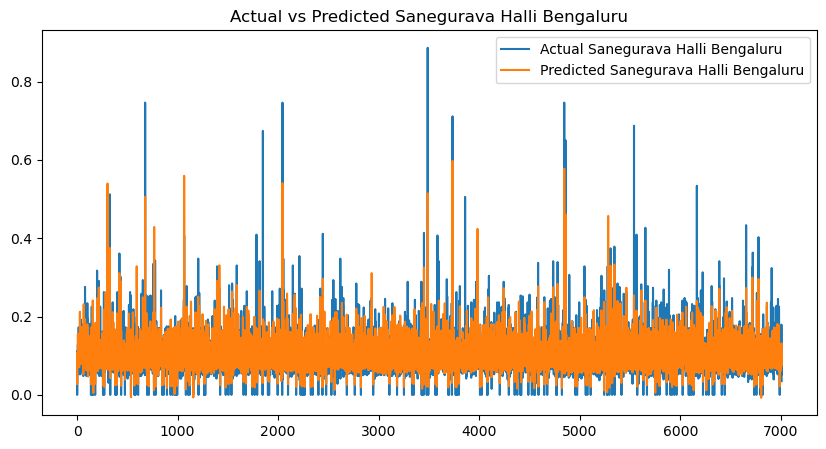

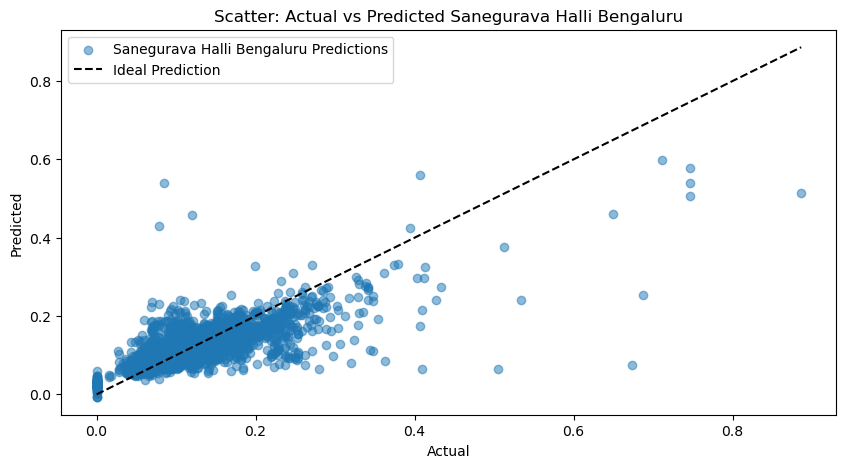

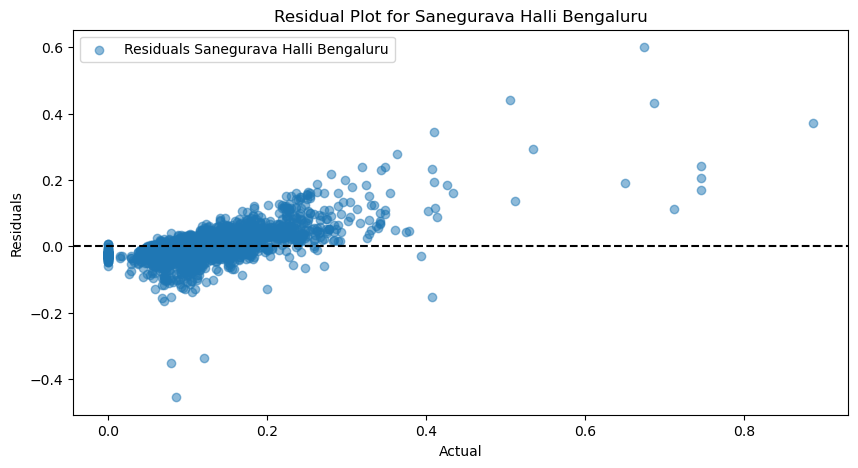

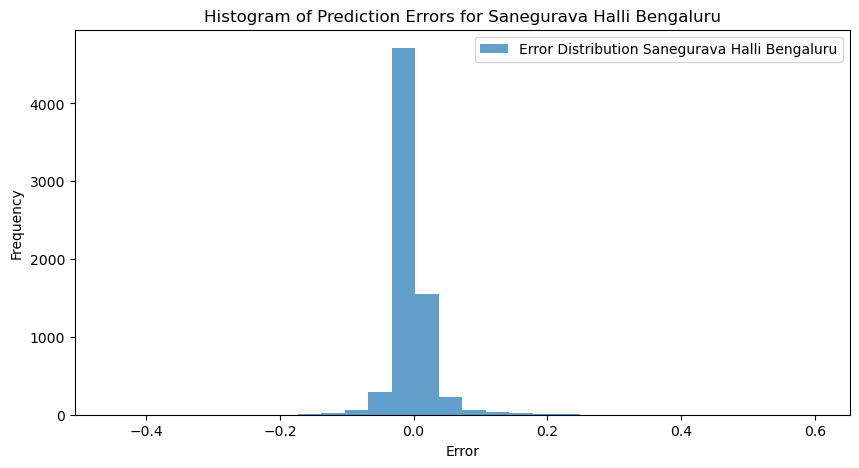

C:\Users\swaya\AppData\Local\Temp\ipykernel_28692\1125678586.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')


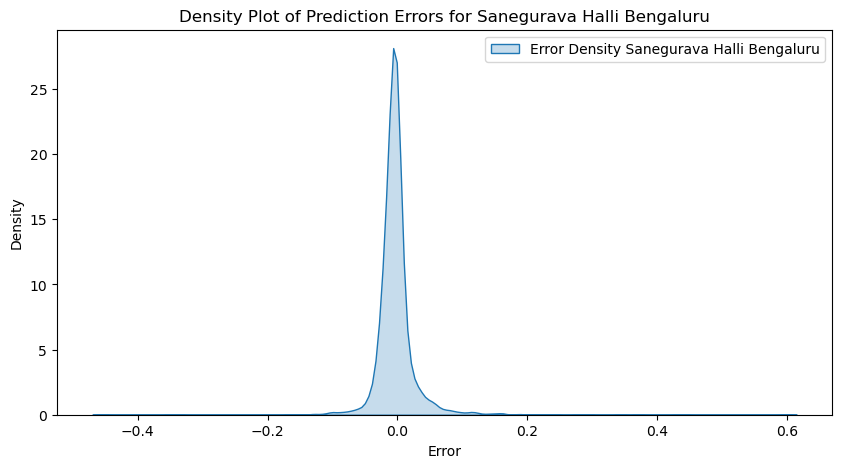

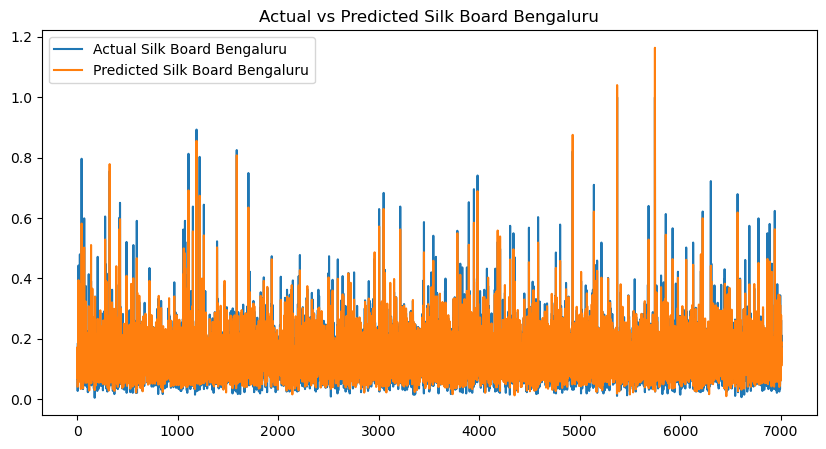

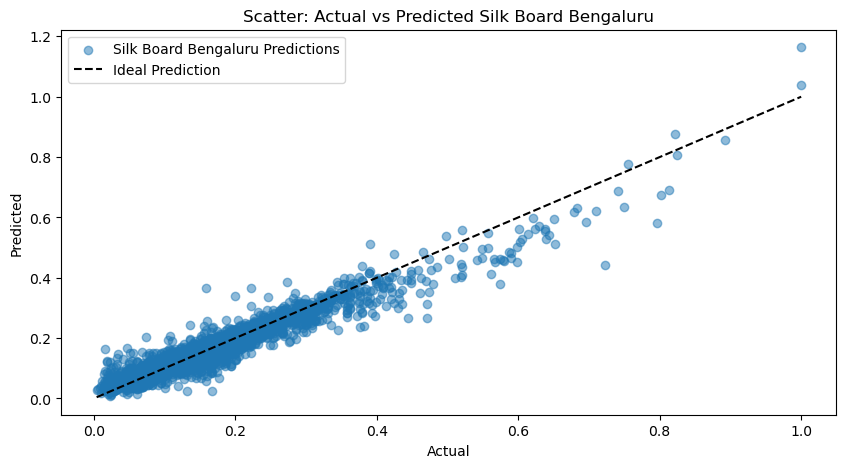

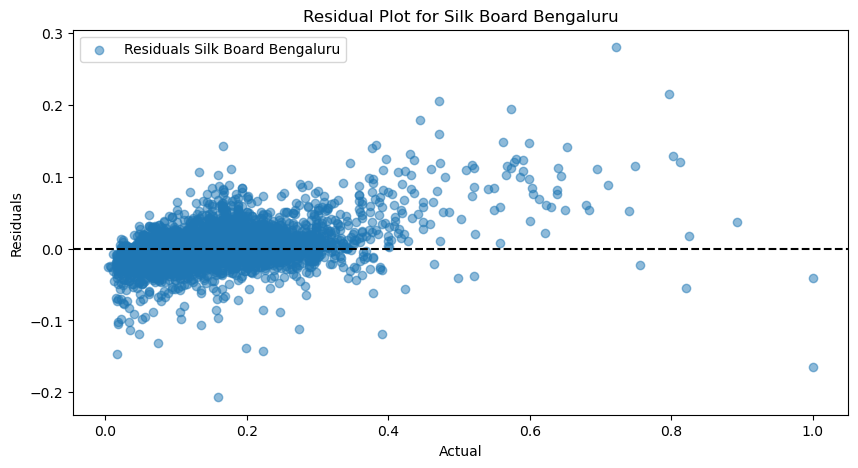

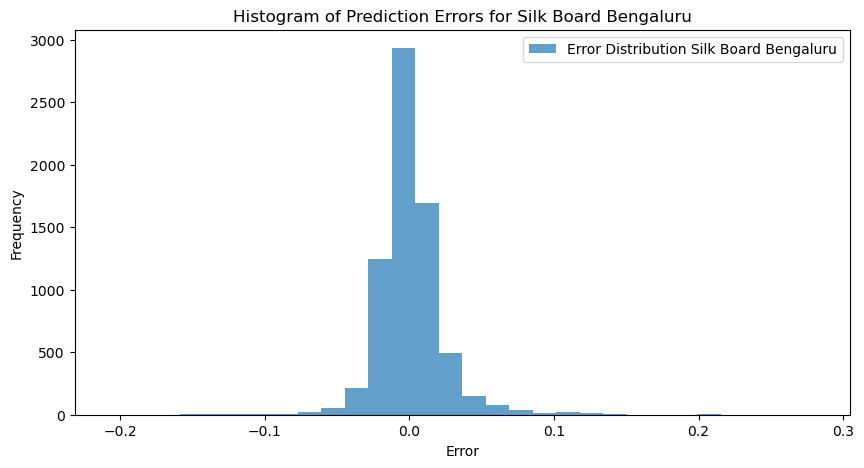

C:\Users\swaya\AppData\Local\Temp\ipykernel_28692\1125678586.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')


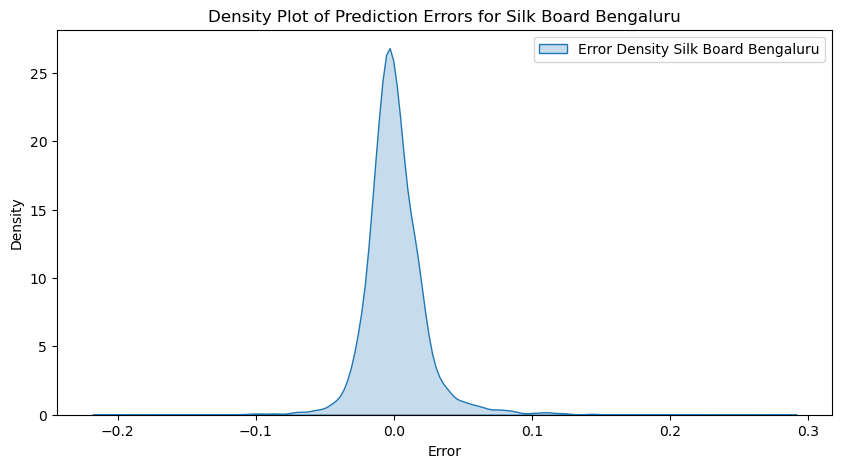

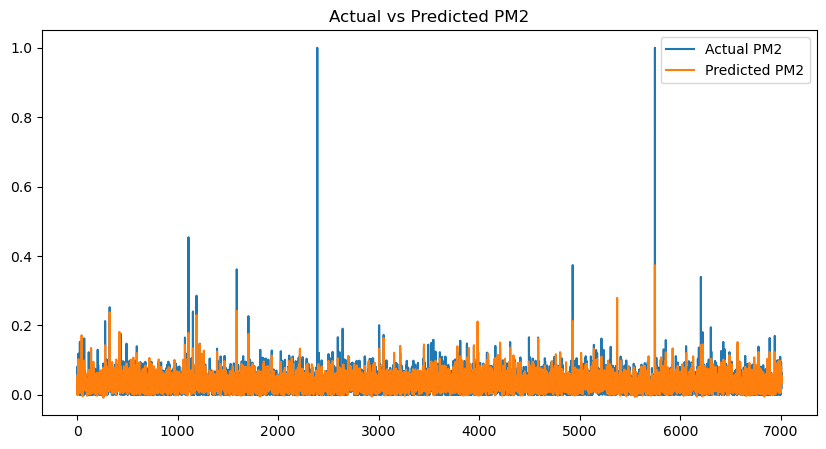

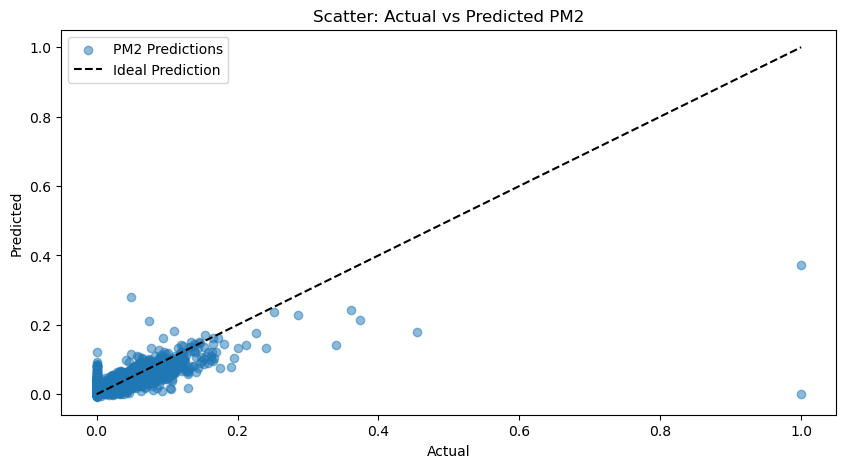

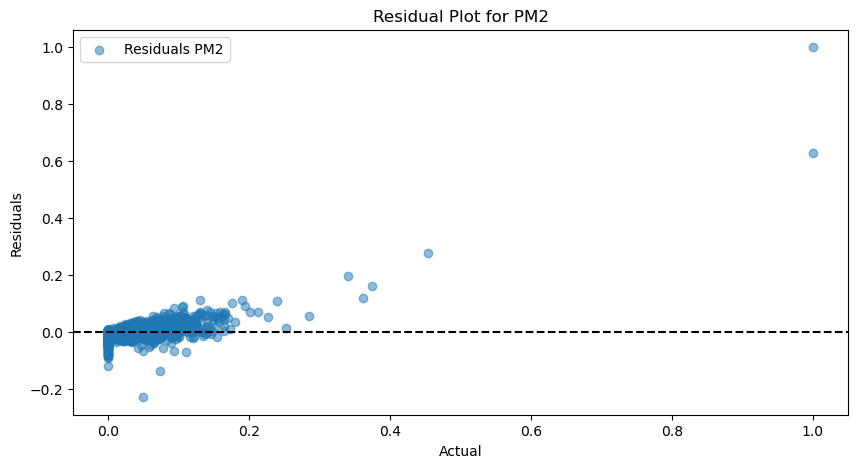

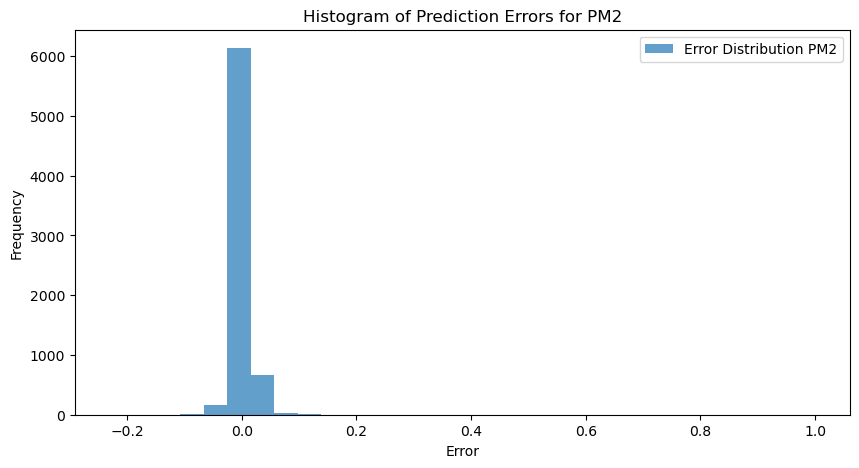

C:\Users\swaya\AppData\Local\Temp\ipykernel_28692\1125678586.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')


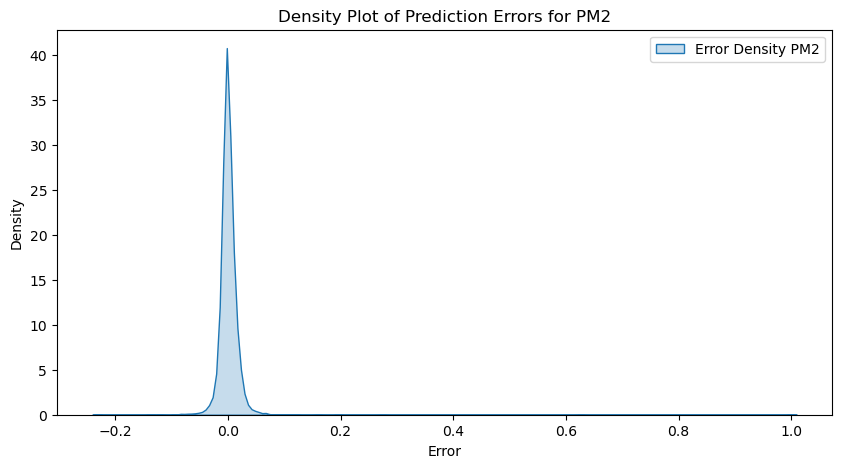

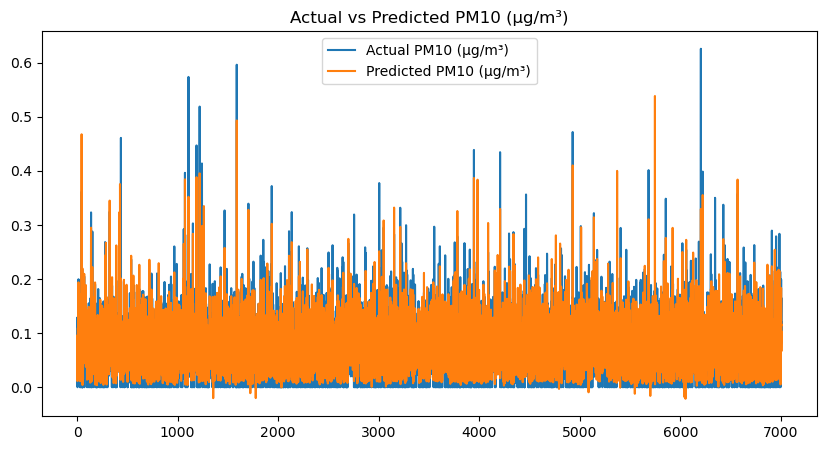

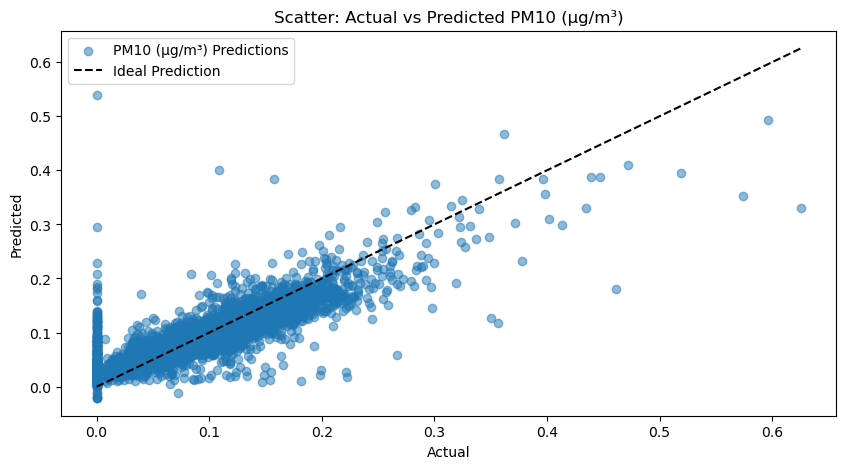

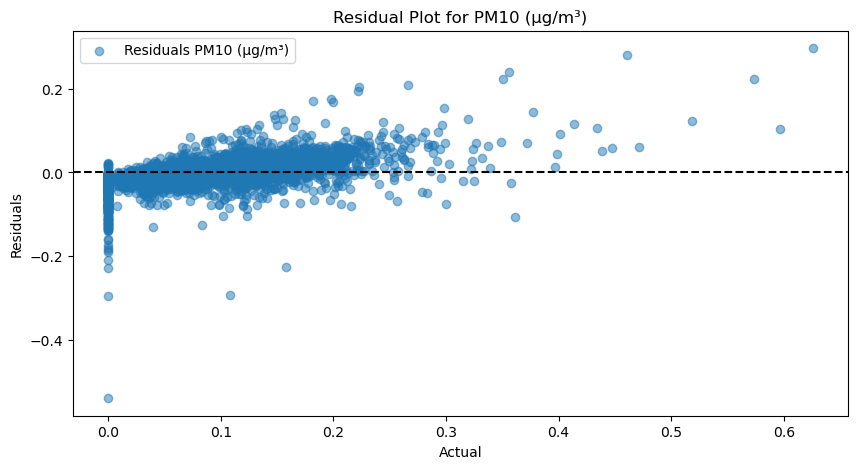

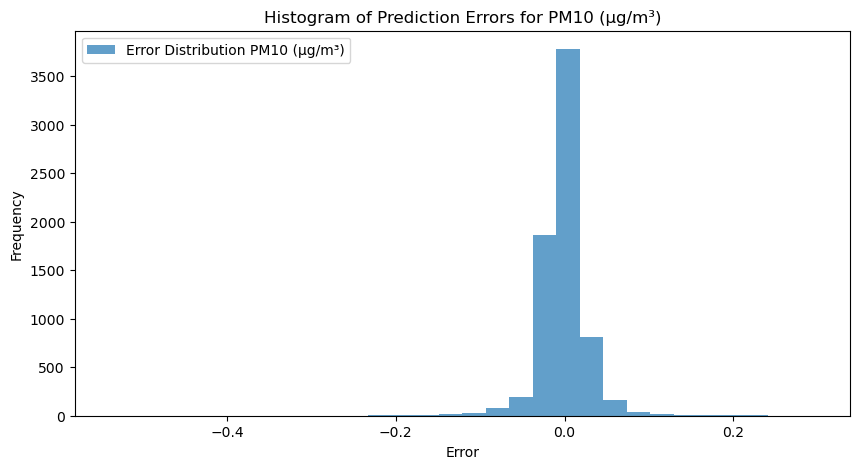

C:\Users\swaya\AppData\Local\Temp\ipykernel_28692\1125678586.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')


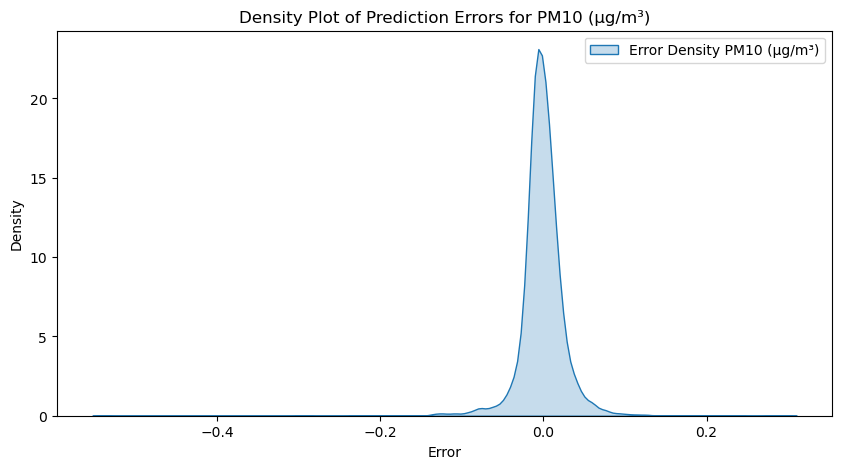

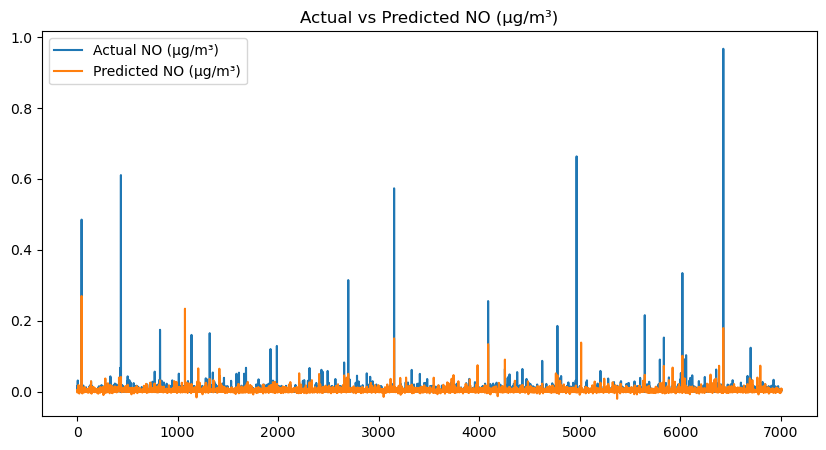

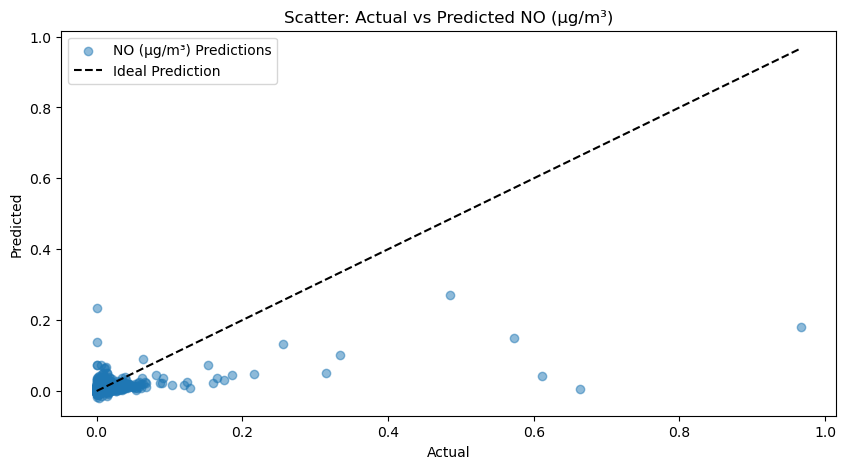

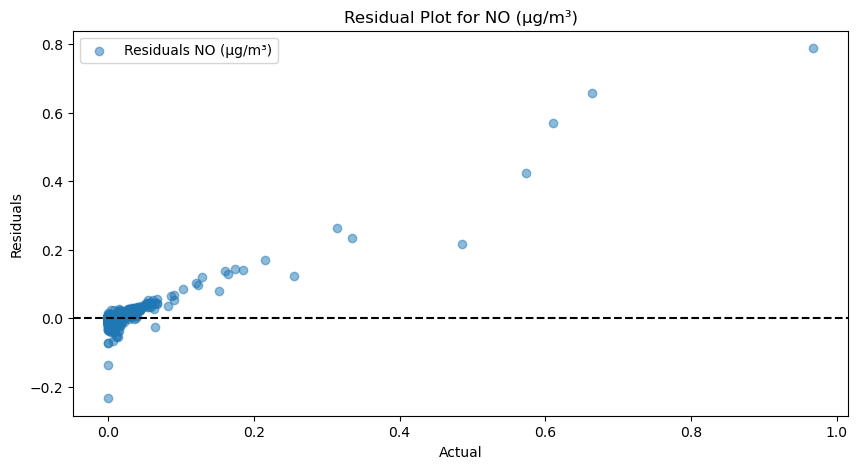

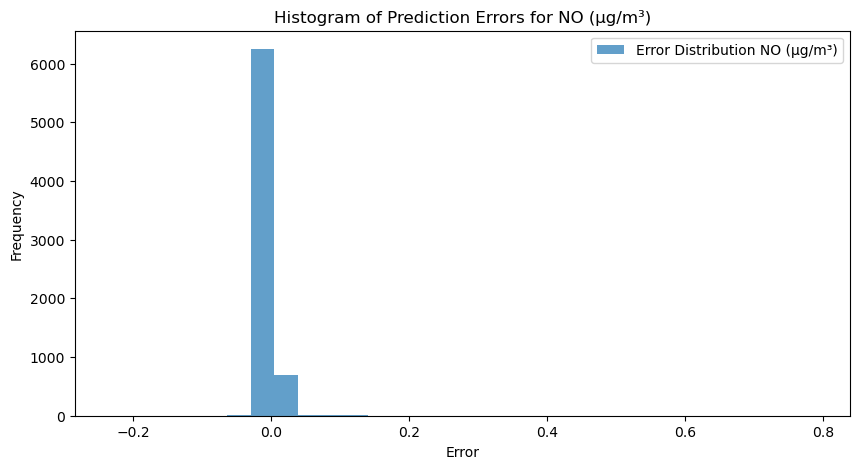

C:\Users\swaya\AppData\Local\Temp\ipykernel_28692\1125678586.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')


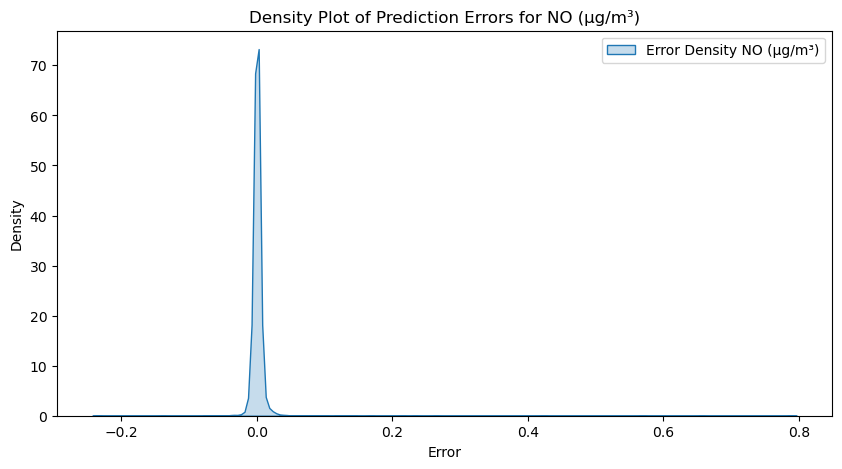

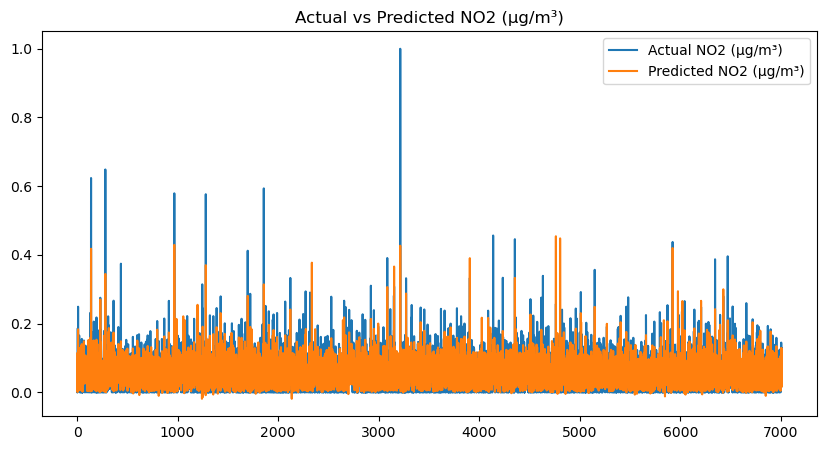

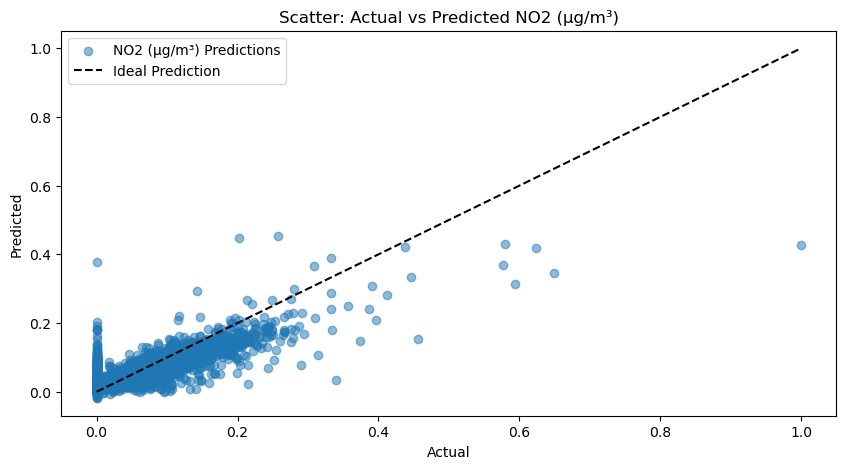

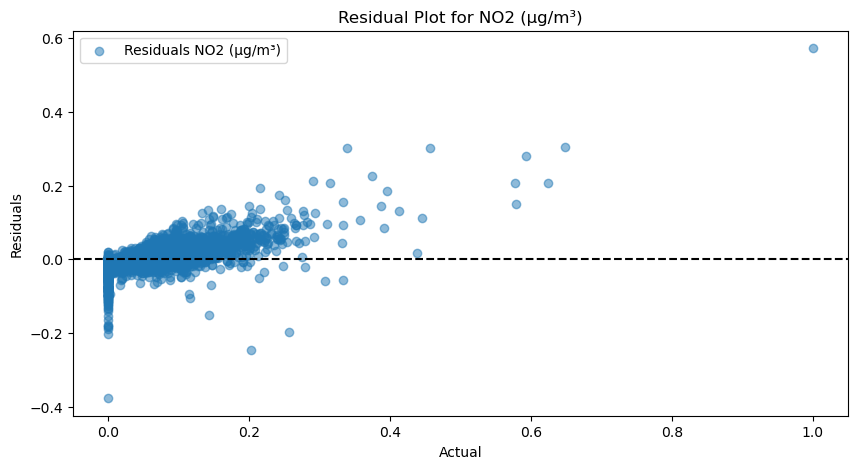

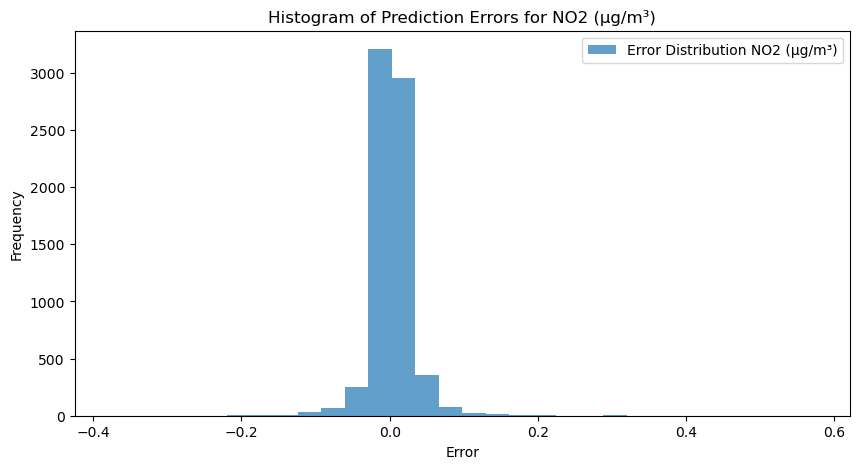

C:\Users\swaya\AppData\Local\Temp\ipykernel_28692\1125678586.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')


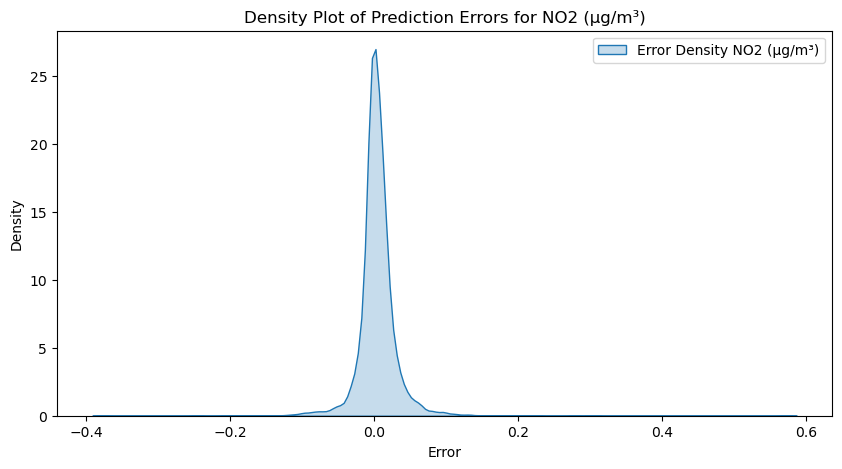

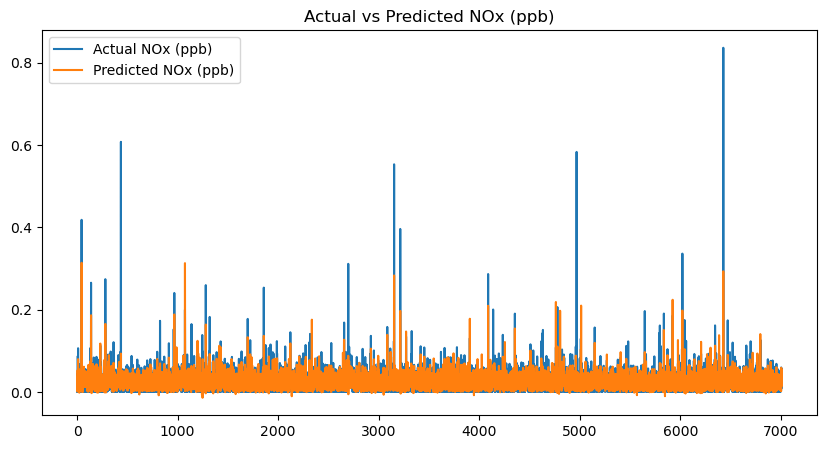

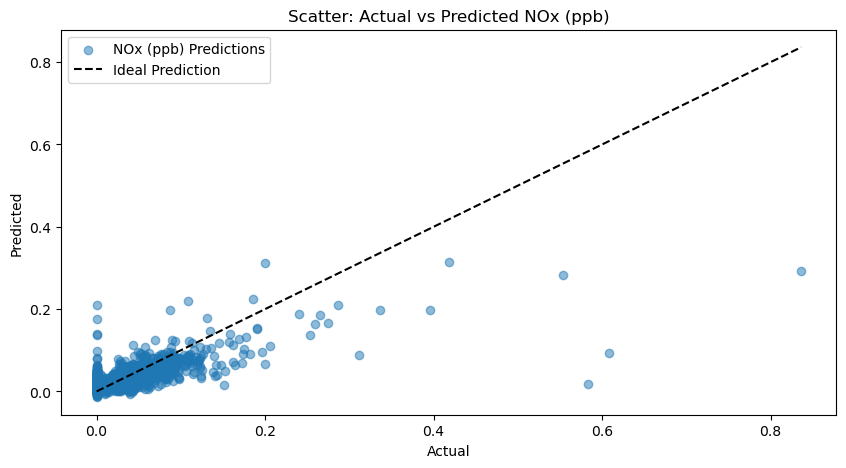

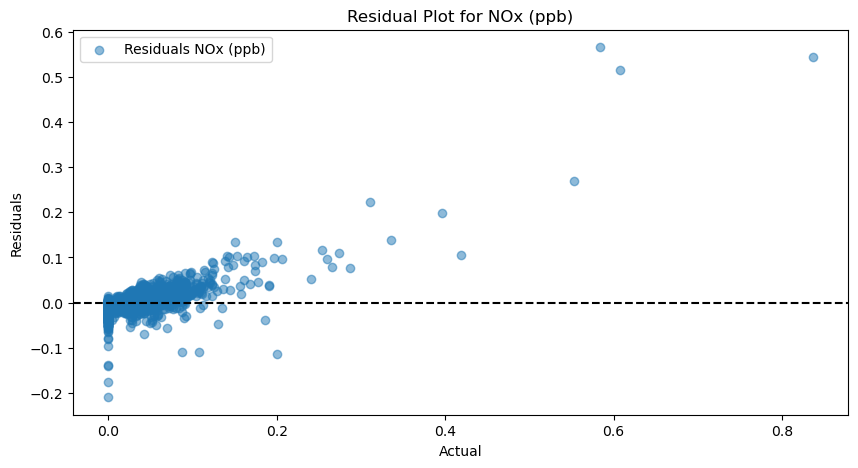

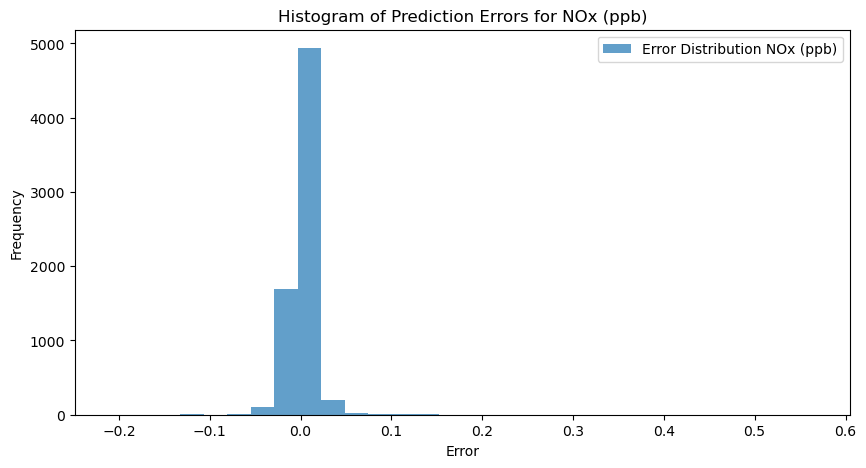

C:\Users\swaya\AppData\Local\Temp\ipykernel_28692\1125678586.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')


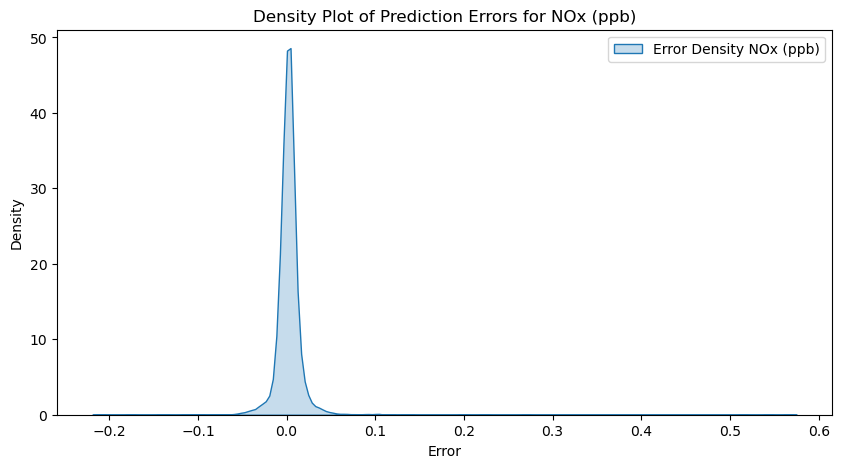

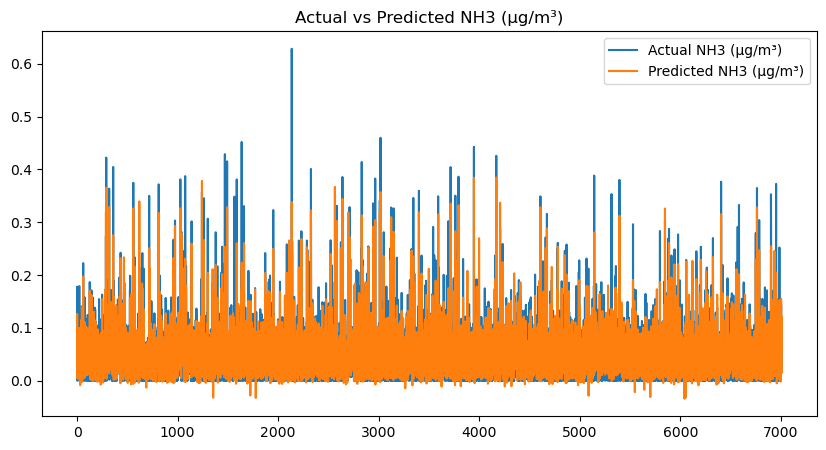

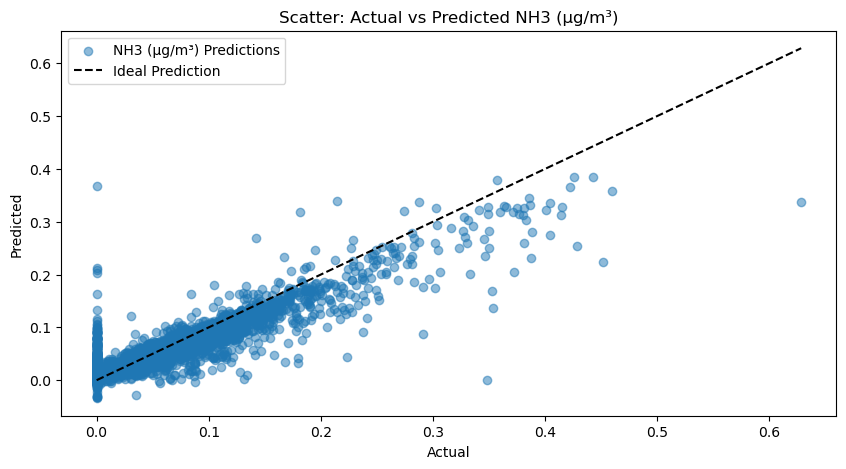

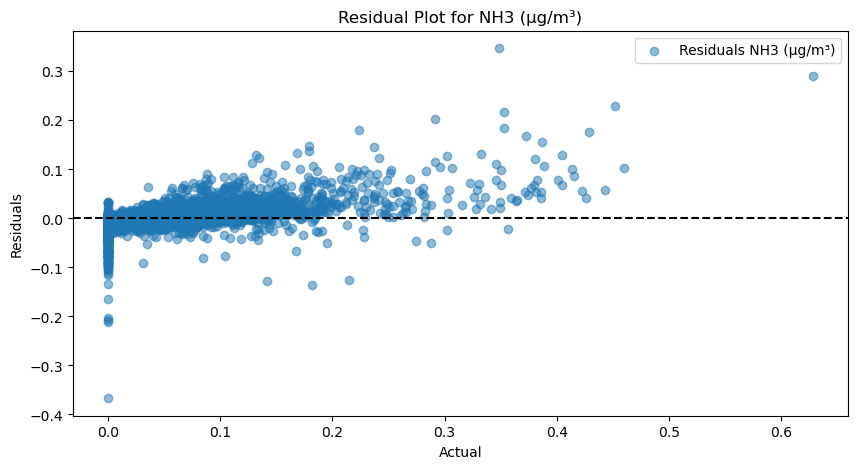

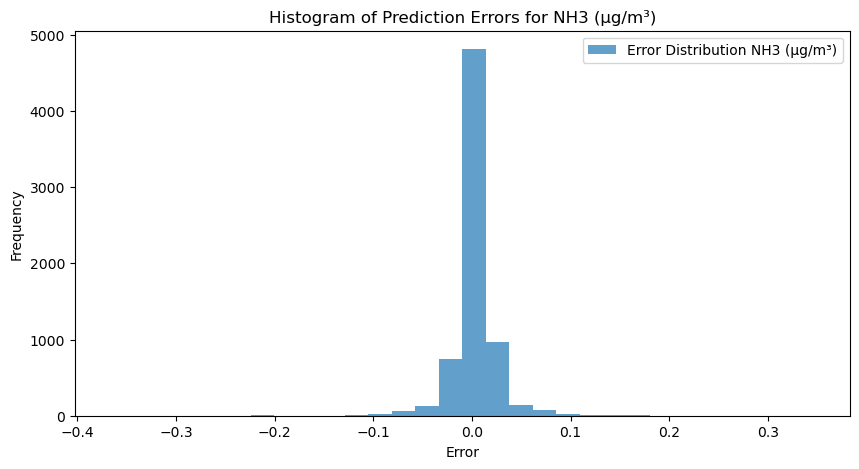

C:\Users\swaya\AppData\Local\Temp\ipykernel_28692\1125678586.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')


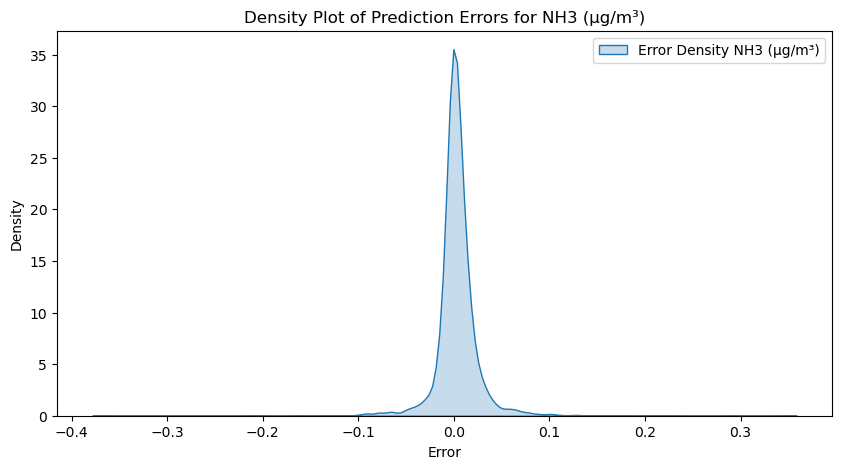

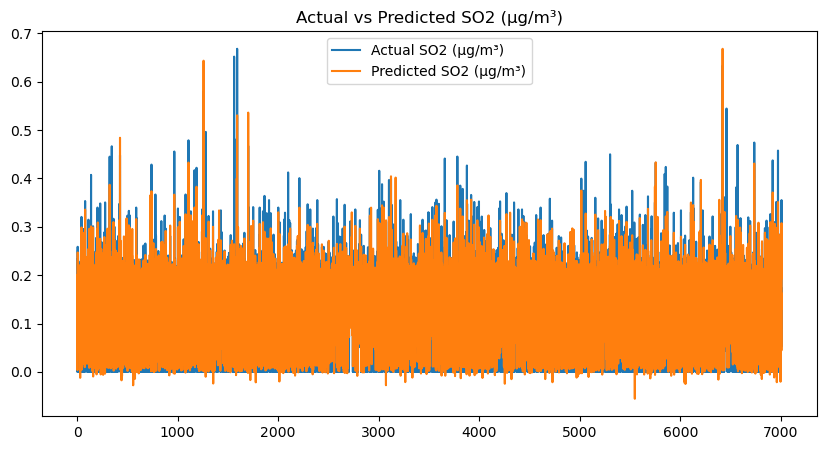

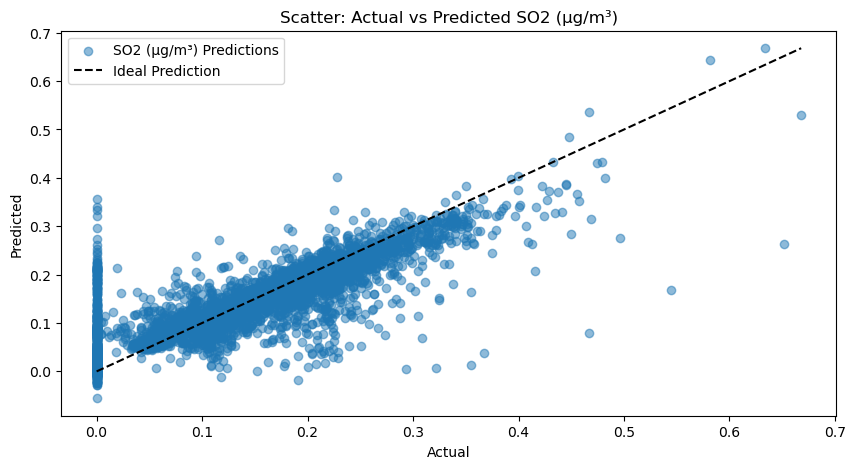

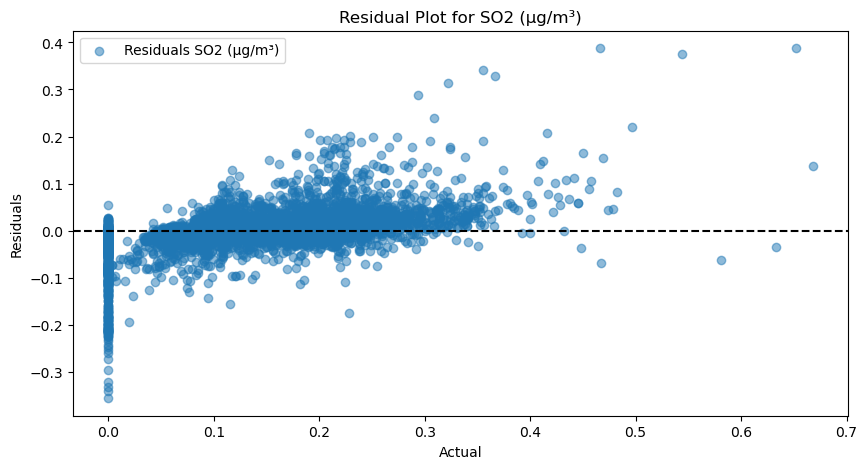

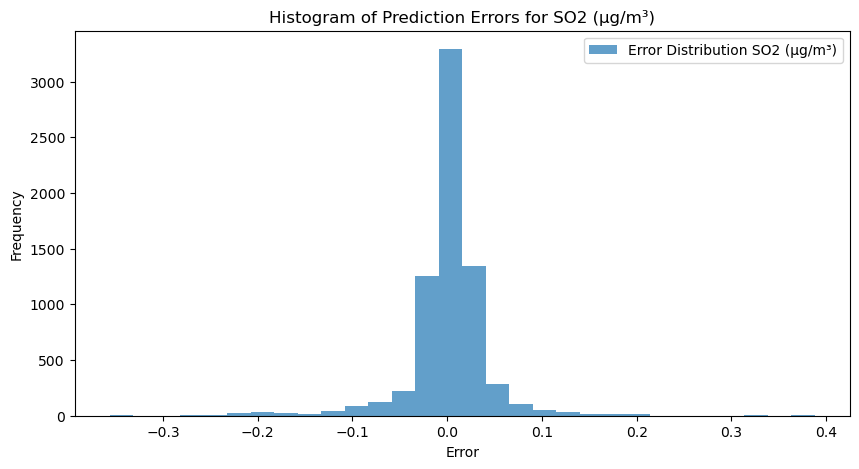

C:\Users\swaya\AppData\Local\Temp\ipykernel_28692\1125678586.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')


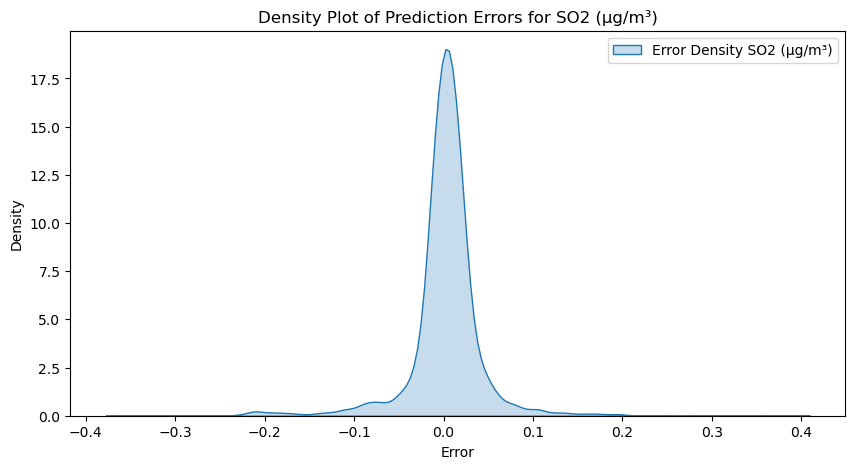

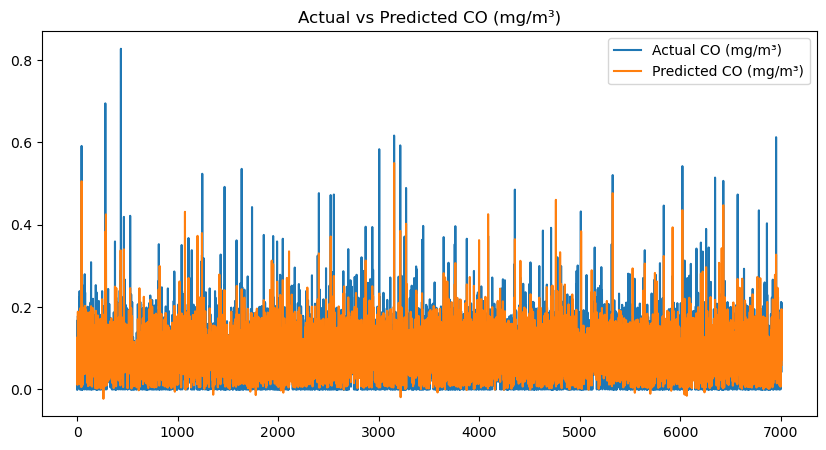

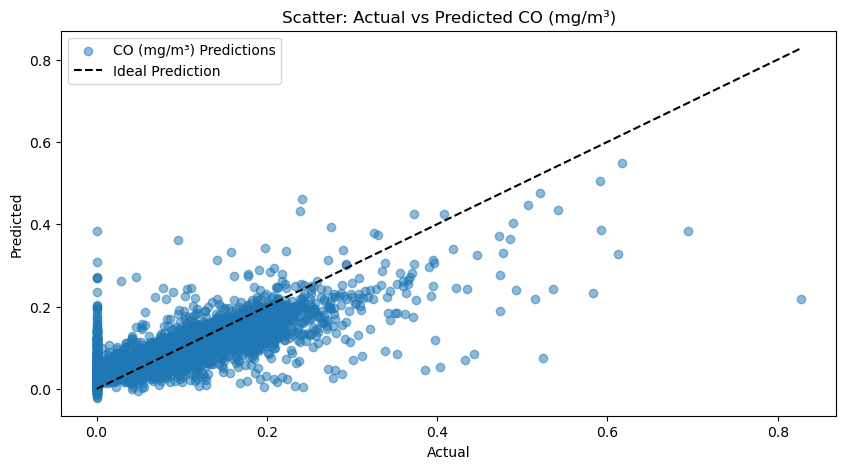

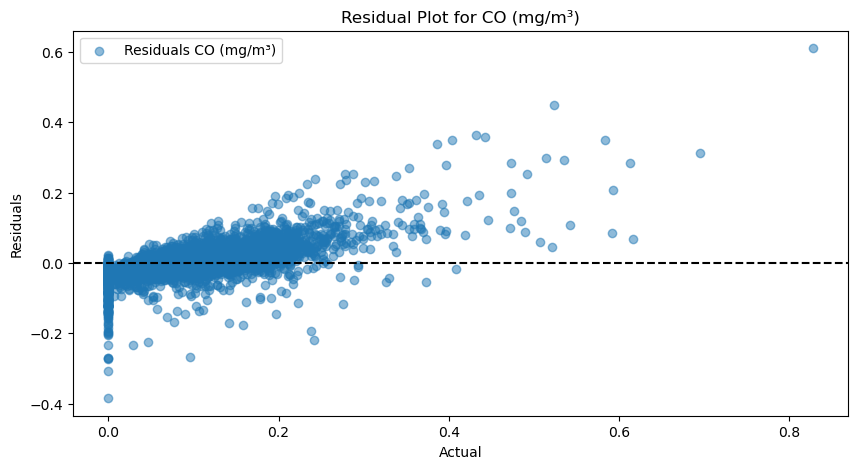

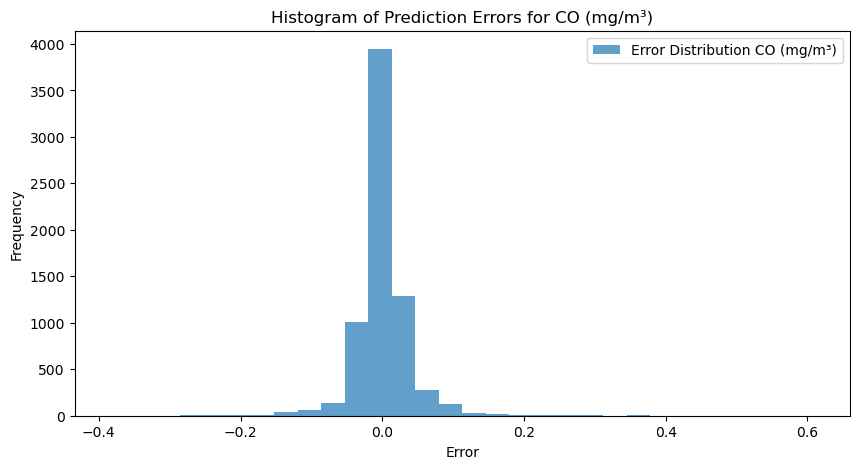

C:\Users\swaya\AppData\Local\Temp\ipykernel_28692\1125678586.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')


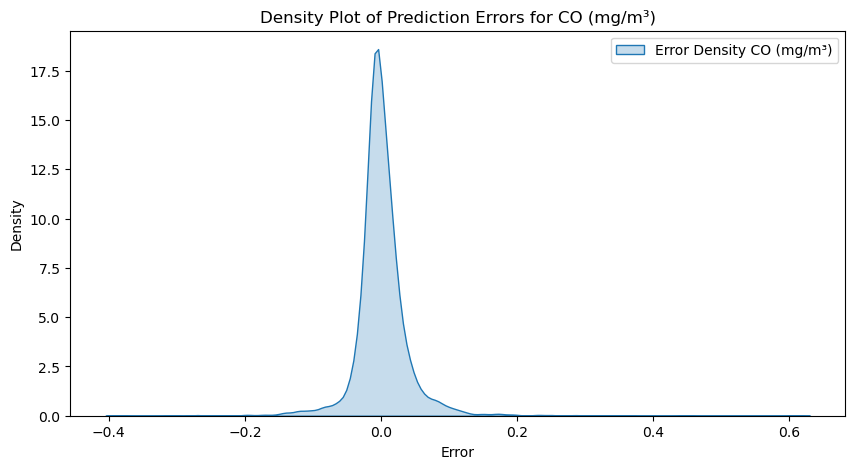

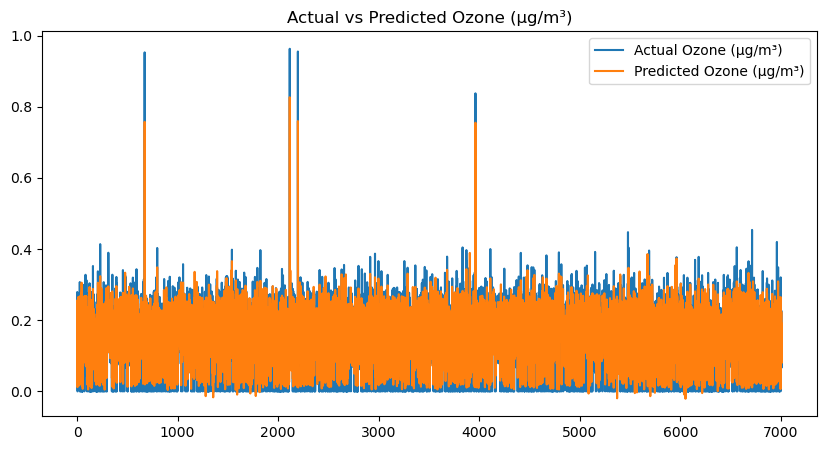

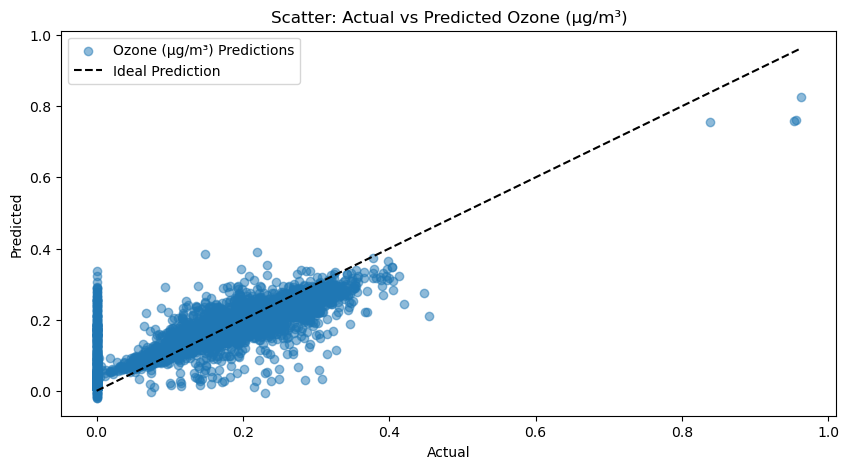

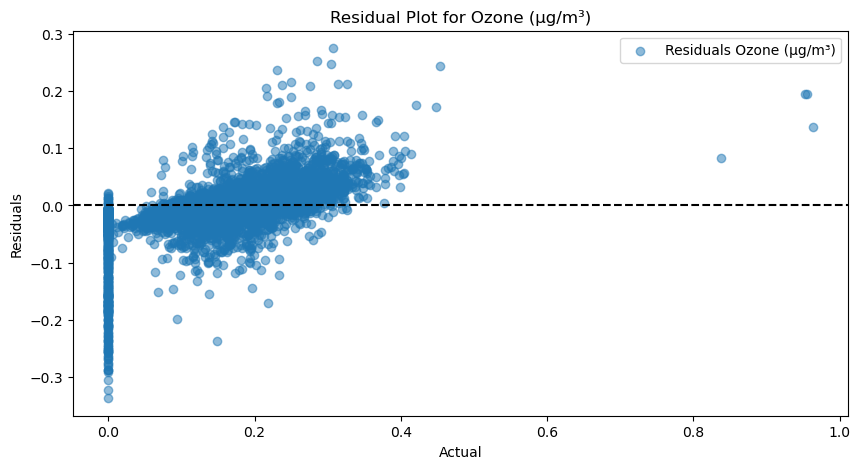

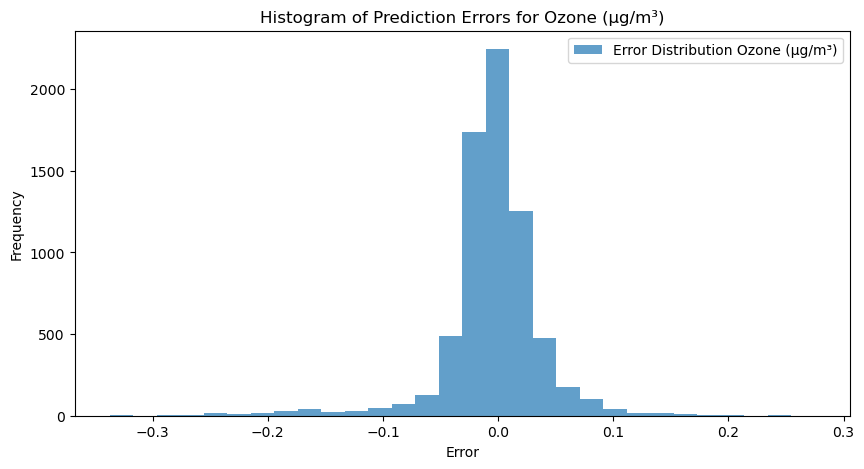

C:\Users\swaya\AppData\Local\Temp\ipykernel_28692\1125678586.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')


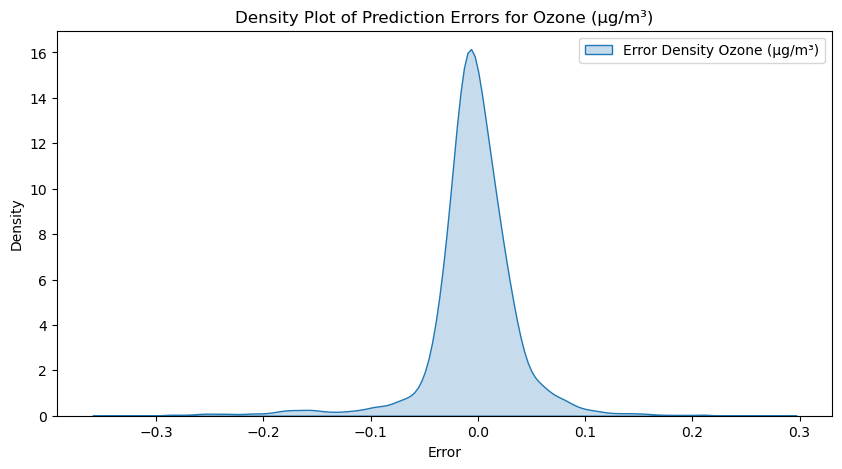

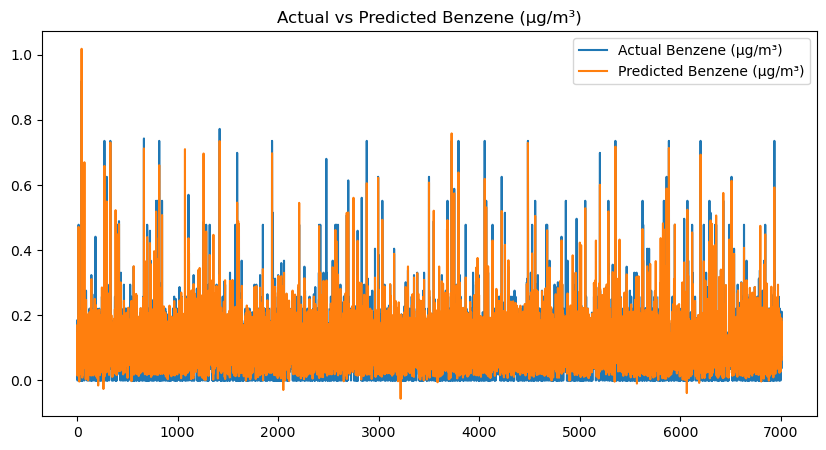

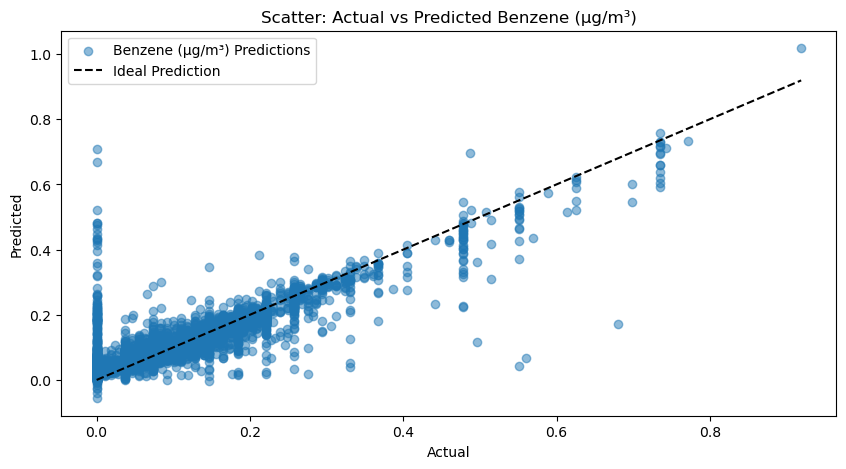

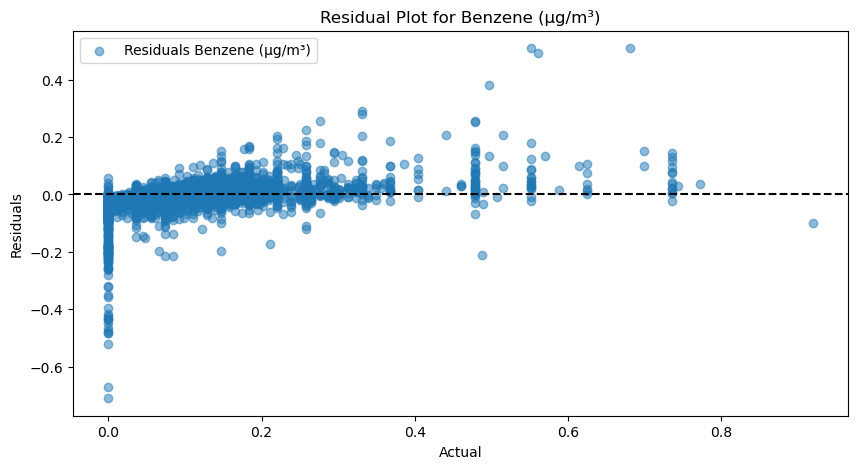

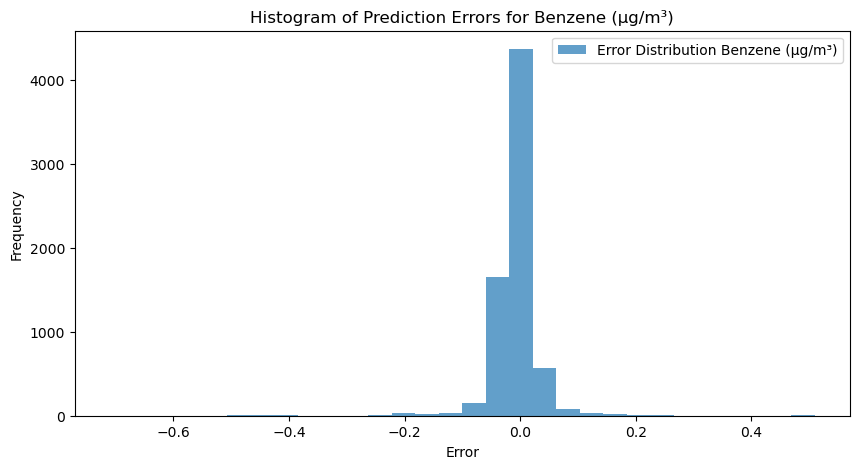

C:\Users\swaya\AppData\Local\Temp\ipykernel_28692\1125678586.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')


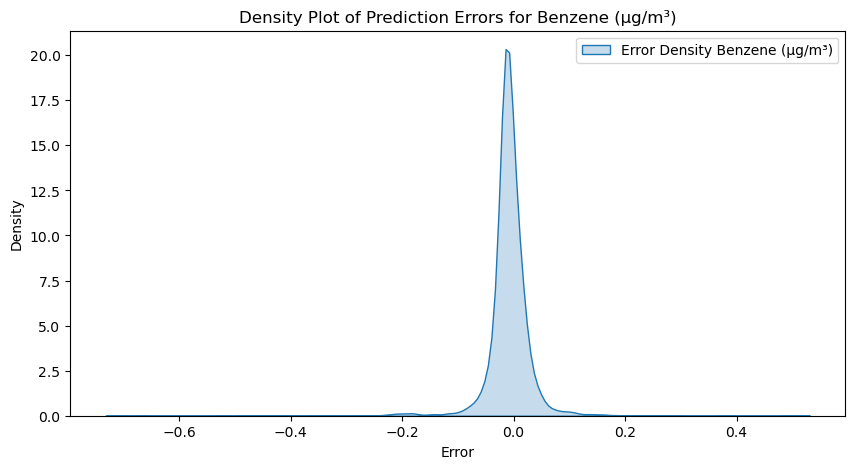

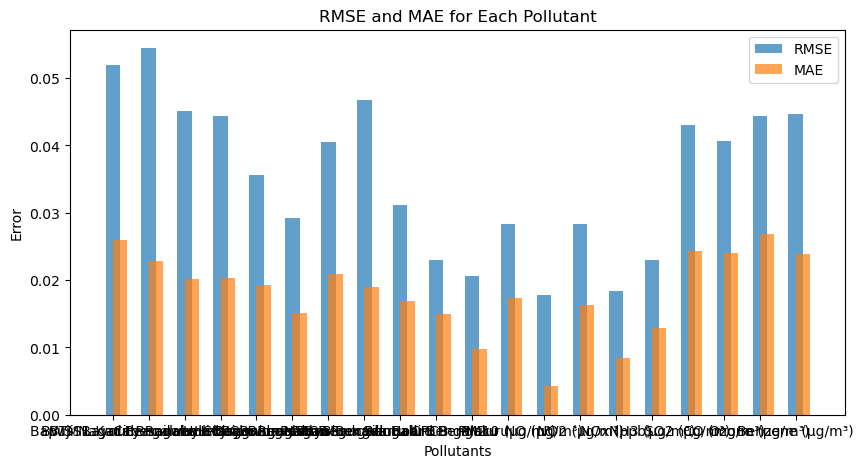

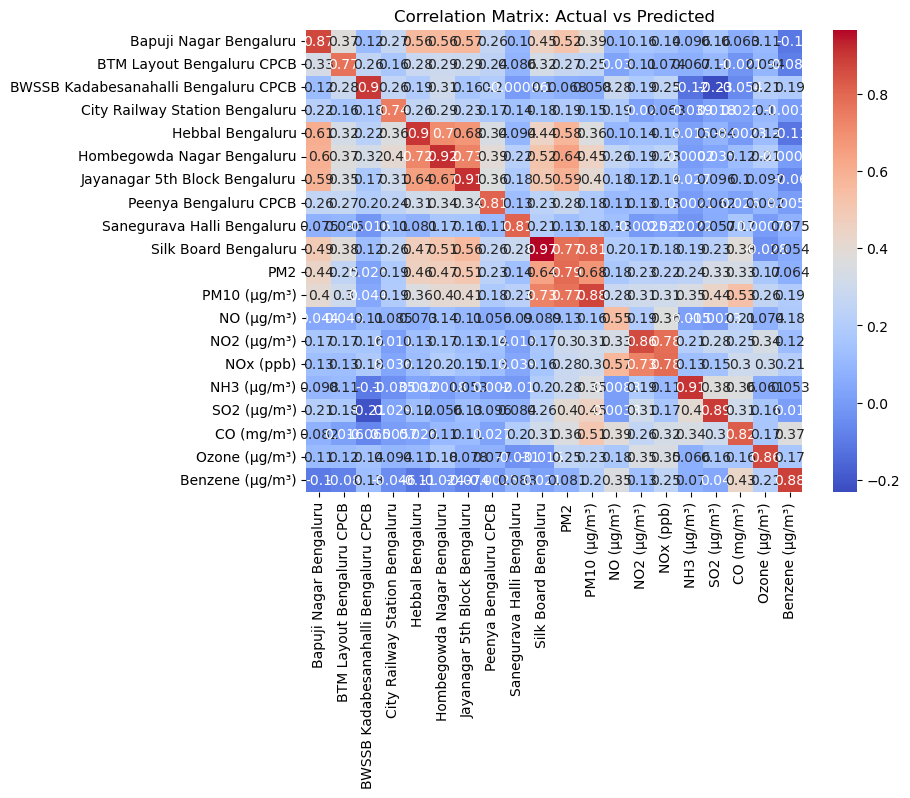

C:\Users\swaya\AppData\Local\Temp\ipykernel_28692\1125678586.py:84: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(errors, vert=False, patch_artist=True, labels=pollutants)


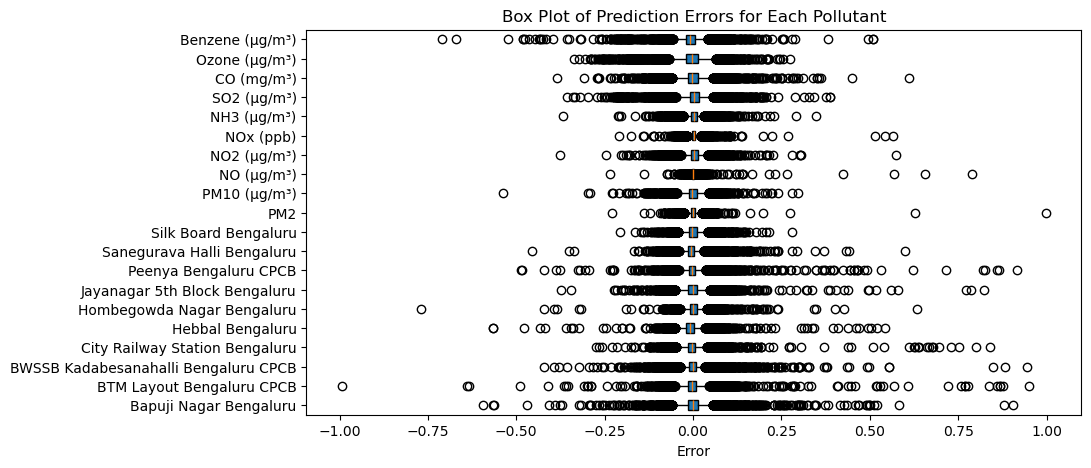

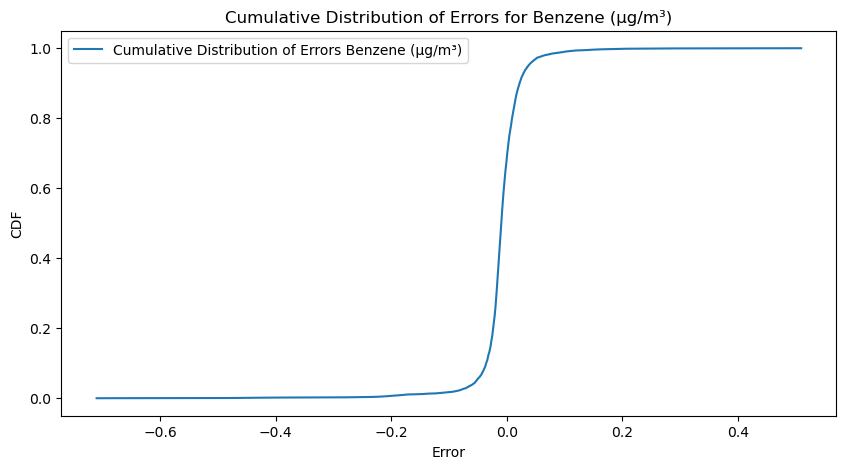

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict
y_pred = model.predict(X_test)

# Pollutants list
pollutants = df.columns

for i, pollutant in enumerate(pollutants):
    # Actual vs Predicted Line Plot
    plt.figure(figsize=(10, 5))
    plt.plot(y_test[:, i], label=f'Actual {pollutant}')
    plt.plot(y_pred[:, i], label=f'Predicted {pollutant}')
    plt.title(f'Actual vs Predicted {pollutant}')
    plt.legend()
    plt.show()

    # Scatter Plot
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test[:, i], y_pred[:, i], label=f'{pollutant} Predictions', alpha=0.5)
    plt.plot([min(y_test[:, i]), max(y_test[:, i])], [min(y_test[:, i]), max(y_test[:, i])], 'k--', label='Ideal Prediction')
    plt.title(f'Scatter: Actual vs Predicted {pollutant}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.show()

    # Residual Plot
    residuals = y_test[:, i] - y_pred[:, i]
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test[:, i], residuals, label=f'Residuals {pollutant}', alpha=0.5)
    plt.axhline(y=0, color='k', linestyle='--')
    plt.title(f'Residual Plot for {pollutant}')
    plt.xlabel('Actual')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()

    # Histogram of Errors
    plt.figure(figsize=(10, 5))
    plt.hist(residuals, bins=30, alpha=0.7, label=f'Error Distribution {pollutant}')
    plt.title(f'Histogram of Prediction Errors for {pollutant}')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Density Plot (Kernel Density Estimate)
    plt.figure(figsize=(10, 5))
    sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')
    plt.title(f'Density Plot of Prediction Errors for {pollutant}')
    plt.xlabel('Error')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Compute RMSE and MAE for each pollutant
rmse = [np.sqrt(mean_squared_error(y_test[:, i], y_pred[:, i])) for i in range(len(pollutants))]
mae = [mean_absolute_error(y_test[:, i], y_pred[:, i]) for i in range(len(pollutants))]

# Bar Chart of RMSE and MAE
plt.figure(figsize=(10, 5))
plt.bar(pollutants, rmse, alpha=0.7, label='RMSE', width=0.4, align='center')
plt.bar(pollutants, mae, alpha=0.7, label='MAE', width=0.4, align='edge')
plt.legend()
plt.title('RMSE and MAE for Each Pollutant')
plt.xlabel('Pollutants')
plt.ylabel('Error')
plt.show()

# Correlation Heatmap of Actual vs Predicted
corr_matrix = np.corrcoef(y_test.T, y_pred.T)[:len(pollutants), len(pollutants):]
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", xticklabels=pollutants, yticklabels=pollutants)
plt.title(f'Correlation Matrix: Actual vs Predicted')
plt.show()

# Box Plot of Residuals
errors = [y_test[:, i] - y_pred[:, i] for i in range(len(pollutants))]
plt.figure(figsize=(10, 5))
plt.boxplot(errors, vert=False, patch_artist=True, labels=pollutants)
plt.title(f'Box Plot of Prediction Errors for Each Pollutant')
plt.xlabel('Error')
plt.show()

# Cumulative Distribution Function (CDF) of Residuals
plt.figure(figsize=(10, 5))
sorted_errors = np.sort(residuals)
cdf = np.arange(len(sorted_errors)) / float(len(sorted_errors))
plt.plot(sorted_errors, cdf, label=f'Cumulative Distribution of Errors {pollutant}')
plt.title(f'Cumulative Distribution of Errors for {pollutant}')
plt.xlabel('Error')
plt.ylabel('CDF')
plt.legend()
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Assuming you have the model trained and data ready:
# y_pred = model.predict(X_test)  # Your model's predictions
# y_test = ...  # Actual values from your test set
# pollutants = ...  # Column names or pollutants you're predicting

# Calculate RMSE, MSE, MAE, R², and Explained Variance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

# Print out the evaluation metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


# Plot Actual vs Predicted for each pollutant
pollutants = df.columns  # Assuming pollutants are the column names of your DataFrame

for i, pollutant in enumerate(pollutants):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test[:, i], label=f'Actual {pollutant}')
    plt.plot(y_pred[:, i], label=f'Predicted {pollutant}')
    plt.title(f'Actual vs Predicted {pollutant}')
    plt.legend()
    plt.show()

    # Scatter Plot
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test[:, i], y_pred[:, i], label=f'{pollutant} Predictions', alpha=0.5)
    plt.plot([min(y_test[:, i]), max(y_test[:, i])], [min(y_test[:, i]), max(y_test[:, i])], 'k--', label='Ideal Prediction')
    plt.title(f'Scatter: Actual vs Predicted {pollutant}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.show()

    # Residual Plot
    residuals = y_test[:, i] - y_pred[:, i]
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test[:, i], residuals, label=f'Residuals {pollutant}', alpha=0.5)
    plt.axhline(y=0, color='k', linestyle='--')
    plt.title(f'Residual Plot for {pollutant}')
    plt.xlabel('Actual')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()

    # Histogram of Errors
    plt.figure(figsize=(10, 5))
    plt.hist(residuals, bins=30, alpha=0.7, label=f'Error Distribution {pollutant}')
    plt.title(f'Histogram of Prediction Errors for {pollutant}')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Density Plot (Kernel Density Estimate)
    plt.figure(figsize=(10, 5))
    sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')
    plt.title(f'Density Plot of Prediction Errors for {pollutant}')
    plt.xlabel('Error')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Compute RMSE and MAE for each pollutant individually (useful if multi-pollutant task)
rmse_pollutants = [np.sqrt(mean_squared_error(y_test[:, i], y_pred[:, i])) for i in range(len(pollutants))]
mae_pollutants = [mean_absolute_error(y_test[:, i], y_pred[:, i]) for i in range(len(pollutants))]

# Bar Chart of RMSE and MAE
plt.figure(figsize=(10, 5))
plt.bar(pollutants, rmse_pollutants, alpha=0.7, label='RMSE', width=0.4, align='center')
plt.bar(pollutants, mae_pollutants, alpha=0.7, label='MAE', width=0.4, align='edge')
plt.legend()
plt.title('RMSE and MAE for Each Pollutant')
plt.xlabel('Pollutants')
plt.ylabel('Error')
plt.show()

# Correlation Heatmap of Actual vs Predicted (for multi-pollutant tasks)
corr_matrix = np.corrcoef(y_test.T, y_pred.T)[:len(pollutants), len(pollutants):]
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", xticklabels=pollutants, yticklabels=pollutants)
plt.title(f'Correlation Matrix: Actual vs Predicted')
plt.show()

# Box Plot of Residuals
errors = [y_test[:, i] - y_pred[:, i] for i in range(len(pollutants))]
plt.figure(figsize=(10, 5))
plt.boxplot(errors, vert=False, patch_artist=True, labels=pollutants)
plt.title(f'Box Plot of Prediction Errors for Each Pollutant')
plt.xlabel('Error')
plt.show()

# Cumulative Distribution Function (CDF) of Residuals
plt.figure(figsize=(10, 5))
sorted_errors = np.sort(residuals)
cdf = np.arange(len(sorted_errors)) / float(len(sorted_errors))
plt.plot(sorted_errors, cdf, label=f'Cumulative Distribution of Errors {pollutant}')
plt.title(f'Cumulative Distribution of Errors for {pollutant}')
plt.xlabel('Error')
plt.ylabel('CDF')
plt.legend()
plt.show()


NameError: name 'y_test' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming you have the data ready (features X and target y)
# Replace this with your actual dataset
X = df.drop('target', axis=1)  # Features (replace 'target' with your actual column name)
y = df['target']  # Target variable (replace 'target' with your actual column name)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate RandomForestRegressor and fit the model
model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate RMSE, MSE, MAE, R², and Explained Variance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

# Print out the evaluation metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')
print(f'Explained Variance Score (EVS): {evs}')

# Plot Actual vs Predicted for each pollutant
pollutants = df.columns  # Assuming pollutants are the column names of your DataFrame

for i, pollutant in enumerate(pollutants):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test[:, i], label=f'Actual {pollutant}')
    plt.plot(y_pred[:, i], label=f'Predicted {pollutant}')
    plt.title(f'Actual vs Predicted {pollutant}')
    plt.legend()
    plt.show()

    # Scatter Plot
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test[:, i], y_pred[:, i], label=f'{pollutant} Predictions', alpha=0.5)
    plt.plot([min(y_test[:, i]), max(y_test[:, i])], [min(y_test[:, i]), max(y_test[:, i])], 'k--', label='Ideal Prediction')
    plt.title(f'Scatter: Actual vs Predicted {pollutant}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.show()

    # Residual Plot
    residuals = y_test[:, i] - y_pred[:, i]
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test[:, i], residuals, label=f'Residuals {pollutant}', alpha=0.5)
    plt.axhline(y=0, color='k', linestyle='--')
    plt.title(f'Residual Plot for {pollutant}')
    plt.xlabel('Actual')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()

    # Histogram of Errors
    plt.figure(figsize=(10, 5))
    plt.hist(residuals, bins=30, alpha=0.7, label=f'Error Distribution {pollutant}')
    plt.title(f'Histogram of Prediction Errors for {pollutant}')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Density Plot (Kernel Density Estimate)
    plt.figure(figsize=(10, 5))
    sns.kdeplot(residuals, shade=True, label=f'Error Density {pollutant}')
    plt.title(f'Density Plot of Prediction Errors for {pollutant}')
    plt.xlabel('Error')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Compute RMSE and MAE for each pollutant individually (useful if multi-pollutant task)
rmse_pollutants = [np.sqrt(mean_squared_error(y_test[:, i], y_pred[:, i])) for i in range(len(pollutants))]
mae_pollutants = [mean_absolute_error(y_test[:, i], y_pred[:, i]) for i in range(len(pollutants))]

# Bar Chart of RMSE and MAE
plt.figure(figsize=(10, 5))
plt.bar(pollutants, rmse_pollutants, alpha=0.7, label='RMSE', width=0.4, align='center')
plt.bar(pollutants, mae_pollutants, alpha=0.7, label='MAE', width=0.4, align='edge')
plt.legend()
plt.title('RMSE and MAE for Each Pollutant')
plt.xlabel('Pollutants')
plt.ylabel('Error')
plt.show()

# Correlation Heatmap of Actual vs Predicted (for multi-pollutant tasks)
corr_matrix = np.corrcoef(y_test.T, y_pred.T)[:len(pollutants), len(pollutants):]
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", xticklabels=pollutants, yticklabels=pollutants)
plt.title(f'Correlation Matrix: Actual vs Predicted')
plt.show()

# Box Plot of Residuals
errors = [y_test[:, i] - y_pred[:, i] for i in range(len(pollutants))]
plt.figure(figsize=(10, 5))
plt.boxplot(errors, vert=False, patch_artist=True, labels=pollutants)
plt.title(f'Box Plot of Prediction Errors for Each Pollutant')
plt.xlabel('Error')
plt.show()

# Cumulative Distribution Function (CDF) of Residuals
plt.figure(figsize=(10, 5))
sorted_errors = np.sort(residuals)
cdf = np.arange(len(sorted_errors)) / float(len(sorted_errors))
plt.plot(sorted_errors, cdf, label=f'Cumulative Distribution of Errors {pollutant}')
plt.title(f'Cumulative Distribution of Errors for {pollutant}')
plt.xlabel('Error')
plt.ylabel('CDF')
plt.legend()
plt.show()


NameError: name 'df' is not defined